    BOO8 - YASHIKA TIRKEY
    BO10 - ANJALI PATWA
    B016 - NUPUR DIVEKAR
    B017 - HARSHITA PUTHRAN
    B026 - VINTI SHUKLA

# **Precious Metals Time Series Analysis: Gold, Silver, and Platinum**

In this project, we used daily historical price data for Platinum, Gold, and Silver obtained from Yahoo Finance through the yfinance Python package.

  The ticker symbols used:

    Gold → "GC=F" (Gold Futures)  

    Silver → "SI=F" (Silver Futures)  

    Platinum → "PL=F" (Platinum Futures)  

Price in USD per troy ounce 1 troy ounce ≈ 31.1035 grams

In this analysis, we conducted an in-depth price analysis of **Platinum**, **Gold**, and **Silver** to understand their trends, patterns, and interdependencies over time. The study included various time series forecasting and statistical modeling techniques:

1. **Seasonal Decomposition** to identify and isolate trend, seasonality, and residual components.

2. **Exponential Smoothing (ETS)** to account for smoothing in irregular data and forecast trends.

3. **ARIMA (AutoRegressive Integrated Moving Average)** models to capture autocorrelations and predict future prices.

4. **ARCH/GARCH models** to forecast volatility and understand risk behavior in the price returns.

5. **Johansen Multivariate Cointegration Test** to examine if these metal prices share a long-run equilibrium relationship.

6. **Granger Causality Test** To check if past values of one variable can help predict another.

7. **VAR (Vector AutoRegression) Model** To model multiple time series together, capturing how they interact with each other over time.

Each of these models helped us evaluate different dimensions of the metal market — from price trends and shocks to volatility clusters and co-movements.

# **Results & Interpretation**

**Seasonal Decomposition** revealed that while the metals exhibit clear trends and short-term fluctuations, seasonality is weak or absent, especially in recent years.

**Exponential Smoothing** and **ARIMA** Models gave satisfactory forecasts. The best-fitting ARIMA models were:

    Gold: ARIMA(0,1,1)

    Silver: ARIMA(1,1,1)

    Platinum: ARIMA(2,1,2)

**ARCH and GARCH Models** confirmed the presence of conditional heteroskedasticity, especially during periods of market shocks, helping us forecast future volatility rather than price levels.

**Johansen Cointegration Test Results**:

  1. No cointegration was found between Gold, Silver, and Platinum prices.

  2. The Trace Statistics were all less than the critical values at 90%, 95%, and 99% confidence levels:

    Trace Statistics: [26.84, 10.05, 0.52]

    Critical Values (95%): [29.79, 15.49, 3.84]

  3. This suggests that there is no long-term equilibrium relationship among the prices of these metals, meaning they move independently in the long run despite short-term co-movements.

**Granger Causality Test**
  1. Evaluated whether past values of one metal can predict another.

  2. Tested all 6 pairwise directions (e.g., Silver → Gold, Gold → Silver, etc.).

  3. Result: In all cases, we failed to reject the null hypothesis (p > 0.05).

  4. This indicates no short-term Granger-causal relationships among the metals.

**VAR Model & Impulse Response Function (IRF)**
  1. Built a Vector AutoRegression (VAR) model to explore dynamic interrelationships.

  2. Used Impulse Response Functions (IRFs) to understand how a shock in one metal (e.g., Silver) affects the future values of others (e.g., Gold, Platinum).

  3. Also plotted Cumulative IRFs to track the total long-term effect of shocks.

  4. Observation: IRFs showed only short-lived responses to shocks, supporting the earlier finding of no strong interdependence


In [ ]:
!pip install yfinance

In [ ]:
!pip install arch

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

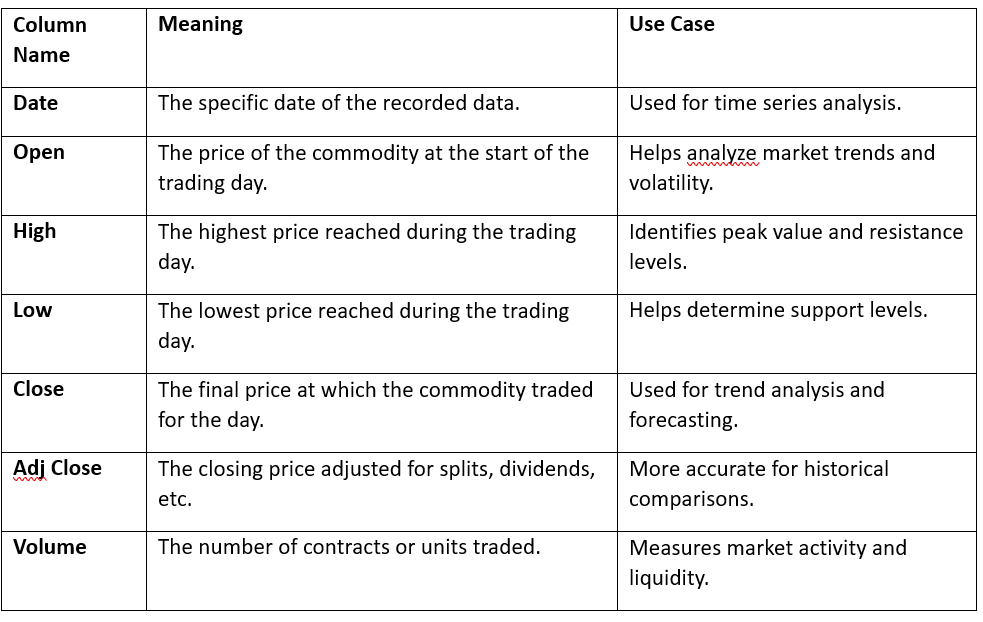

In [ ]:
# Define the tickers
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
platinum = yf.Ticker("PL=F")

In [ ]:
#Get historical data for the last 10 years
gold_data = gold.history(start="2014-01-01", end="2024-01-01")
silver_data = silver.history(start="2014-01-01", end="2024-01-01")
platinum_data = platinum.history(start="2014-01-01", end="2024-01-01")

Closing Price:

  The closing price is the price at which a commodity (like gold) is traded at the end of a specific trading period (e.g., a day). It's a widely accepted and standardized measure used in financial analysis and time series modeling.

Why Closing Price is Common:
  Standard Practice: Financial data providers and analysts often use closing prices as the primary data point for time series analysis, making it easier to compare and analyze data across different sources.

  Reflects Daily Trend: The closing price captures the overall trend of the price movement for the day, which can be valuable for identifying patterns and predicting future price movements.  

In [ ]:
#gold_data = gold_data['Close'].resample('D').agg(['mean', 'last', 'max', 'min'])
#silver_daata = silver_data['Close'].resample('D').agg(['mean', 'last', 'max', 'min'])

gold_data = gold_data['Close'].resample('D').last()
silver_data = silver_data['Close'].resample('D').last()
platinum_data = platinum_data['Close'].resample('D').last()


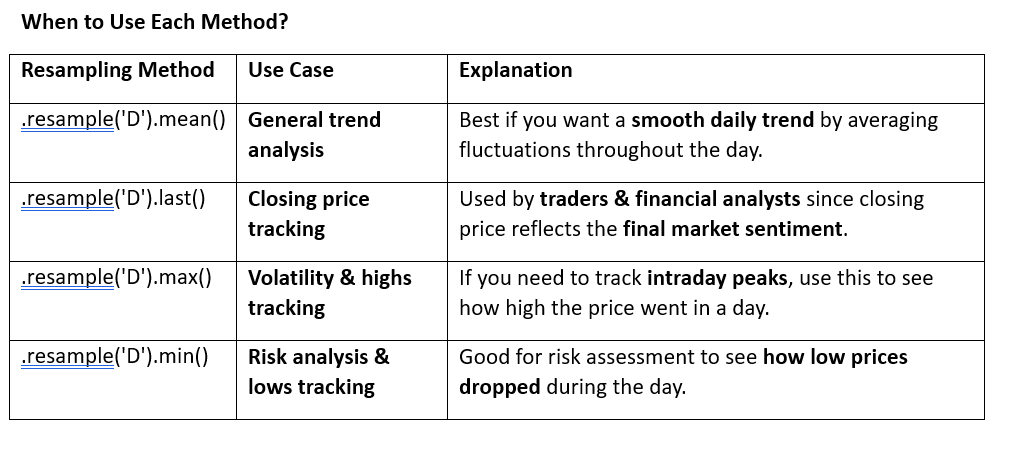

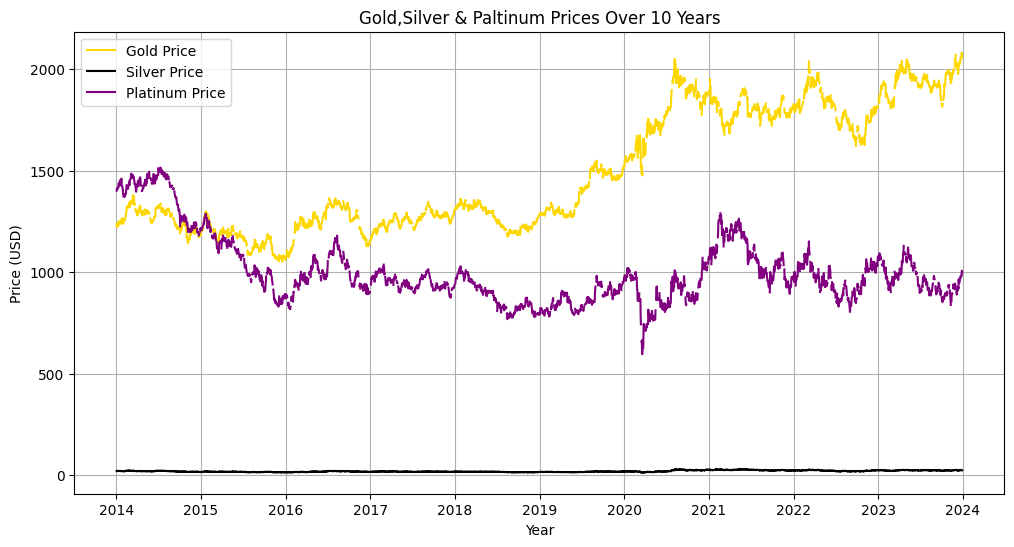

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data, label='Gold Price', color='gold')
plt.plot(silver_data.index, silver_data, label='Silver Price', color='black')
plt.plot(platinum_data.index, platinum_data, label='Platinum Price', color='purple')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Gold,Silver & Paltinum Prices Over 10 Years")
plt.legend()
plt.grid()
plt.show()

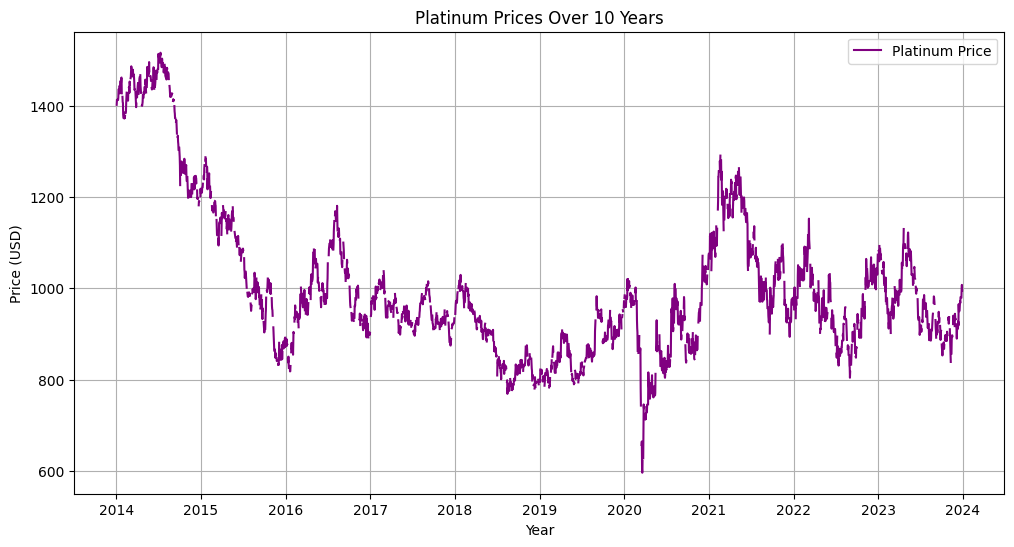

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(platinum_data.index, platinum_data, label='Platinum Price', color='purple')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Platinum Prices Over 10 Years")
plt.legend()
plt.grid()
plt.show()

# Platinum Price Trend Analysis (2014-2024)

## Observations
1. In 2014, platinum prices were at a peak of approximately 1400 USD.
2. Prices saw a sharp decline, reaching their lowest point around early 2016 (around 800 USD).
3. From 2016 onwards, gold prices showed a recovery with fluctuations.
4. Another significant increase occurred around 2020, potentially influenced by global economic conditions such as the COVID-19 pandemic.
5. Between 2020 and 2024, gold prices showed volatility with periods of rise and fall, but overall remained higher compared to the lowest point in 2016.
6. The trend suggests that gold prices experienced notable fluctuations but showed signs of recovery toward 2024.

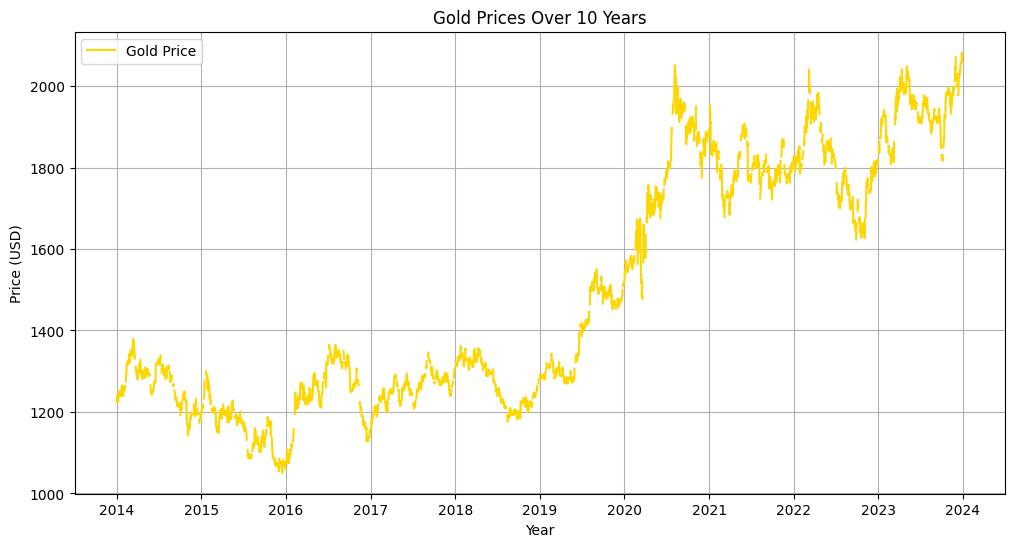

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data, label='Gold Price', color='gold')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Gold Prices Over 10 Years")
plt.legend()
plt.grid()
plt.show()

"""
# Gold Price Analysis (2014 - 2024)

## Observation
The gold price over the past decade (2014-2024) has demonstrated significant fluctuations, ranging from approximately 1000 to 2000 USD per ounce.

### Key Observations:
1. **2014-2015:** Gold prices declined from around 1400 USD to nearly 1050 USD, reflecting economic stability and strong equity markets.
2. **2016-2019:** A gradual recovery took place, with prices fluctuating between 1200 and 1400 USD, influenced by global economic conditions and interest rate policies.
3. **2019-2020:** A sharp uptrend began in late 2019, accelerating into 2020, with prices exceeding 2000 USD due to economic uncertainty from the COVID-19 pandemic and increased demand for safe-haven assets.
4. **2021-Present:** The price remained volatile, experiencing fluctuations but generally staying above 1800 USD, reflecting inflation concerns and ongoing market shifts.

### Conclusion:
Gold has proven to be a resilient asset, reacting strongly to global economic events. Its sharp rise in 2020 and continued high valuation emphasize its role as a hedge against economic uncertainty.
"""


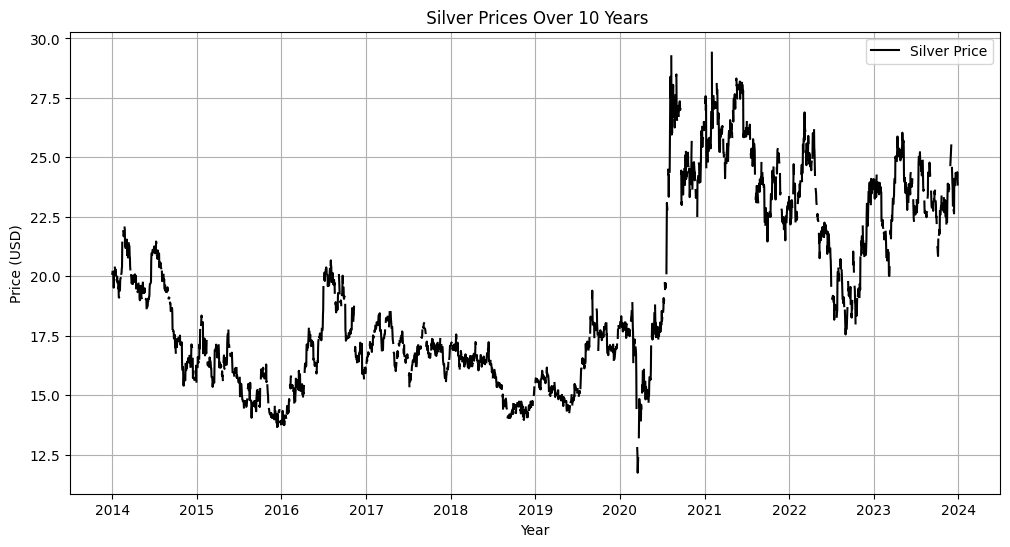

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(silver_data.index, silver_data, label='Silver Price', color='black')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title(" Silver Prices Over 10 Years")
plt.legend()
plt.grid()
plt.show()

"""
# Silver Price Analysis (2014 - 2024)

## Observation
The silver price over the past decade (2014-2024) has exhibited substantial fluctuations, ranging from approximately 12.5 to 30.5 USD per ounce, influenced by economic factors and market conditions.

### Key Observations:
1. **2014-2016:** A downtrend was observed, with prices declining from around 20 USD to approximately 12.5 USD by early 2016.
2. **2016-2019:** Prices showed moderate recovery and fluctuated mostly between 15 USD and 18 USD.
3. **2020 Surge:** A significant price spike occurred in early 2020, peaking around 30.5 USD, likely due to economic uncertainty related to the COVID-19 pandemic and increased investor interest in precious metals.
4. **2021-Present:** The market remained volatile, with prices oscillating between 22 USD and 28 USD, reflecting ongoing economic fluctuations, inflation concerns, and shifting market sentiments.

### Conclusion:
Silver has experienced cycles of decline, steady growth, and rapid spikes, often driven by global economic events. The sharp rise in 2020, followed by continued volatility, highlights silver’s role as a valuable asset in times of economic uncertainty and financial instability.
"""

In [ ]:
gold_data = gold_data.dropna()
silver_data = silver_data.dropna()
platinum_data = platinum_data.dropna()

In [ ]:
def plot_decomposition(data, title, model='additive'):
    decomposed = seasonal_decompose(data.dropna(), model=model, period=365)

    fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True)

    # Plot each component in separate subplots
    axes[0].plot(decomposed.observed, label="Observed", color="blue")
    axes[0].set_ylabel("Observed", fontsize=14)
    axes[0].legend(fontsize=12)

    axes[1].plot(decomposed.trend, label="Trend", color="red")
    axes[1].set_ylabel("Trend", fontsize=14)
    axes[1].legend(fontsize=12)

    axes[2].plot(decomposed.seasonal, label="Seasonal", color="green")
    axes[2].set_ylabel("Seasonal", fontsize=14)
    axes[2].legend(fontsize=12)

    axes[3].plot(decomposed.resid, label="Residual", color="purple")
    axes[3].set_ylabel("Residual", fontsize=14)
    axes[3].legend(fontsize=12)

    # Title and labels
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


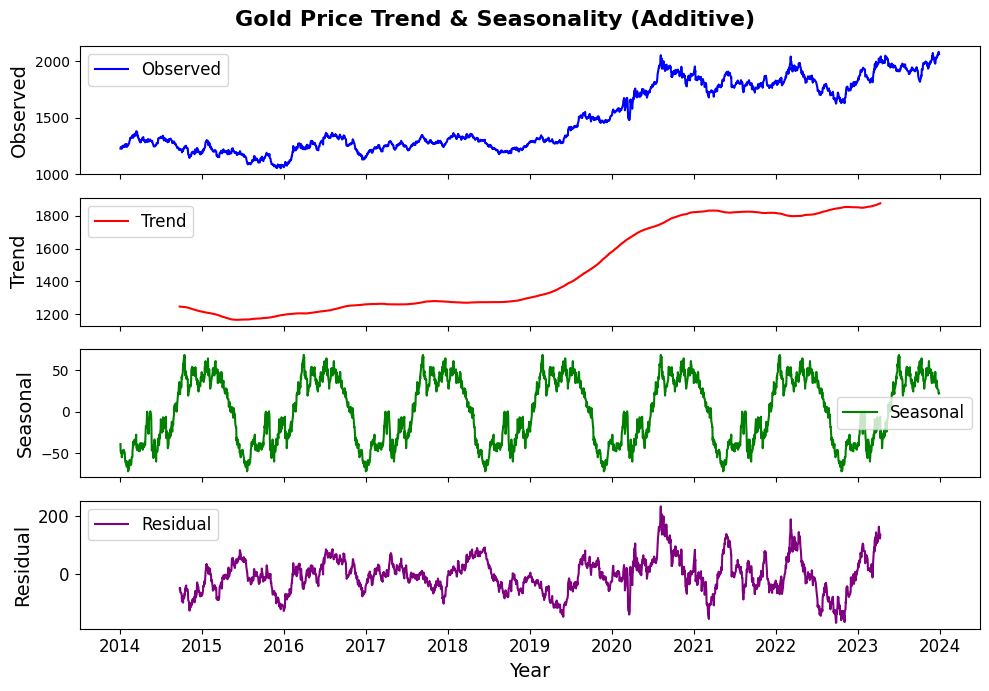

In [ ]:
# **Plot Gold Decomposition**
plot_decomposition(gold_data, "Gold Price Trend & Seasonality (Additive)")


"""
# Observations on Seasonal Decomposition of Gold Prices (Additive)

## 1. Observed Component:
- The gold price shows an overall increasing trend with fluctuations.
- Noticeable peaks and troughs indicate periods of volatility.

## 2. Trend Component:
- The trend remains relatively stable initially, followed by a steady increase.
- A significant upward movement is observed in the later period, suggesting long-term growth.

## 3. Seasonal Component:
- A repeating cyclical pattern is present, indicating seasonal effects.
- Periodic fluctuations suggest that gold prices exhibit recurring yearly trends.

## 4. Residual Component:
- The residuals show variability, with some periods experiencing higher fluctuations.
- Increased residual magnitude in later periods suggests higher volatility and external market influences.

## Conclusion:
Gold prices follow a clear upward trend with periodic seasonal variations. The increasing volatility in residuals indicates the impact of external economic factors and market events.
"""


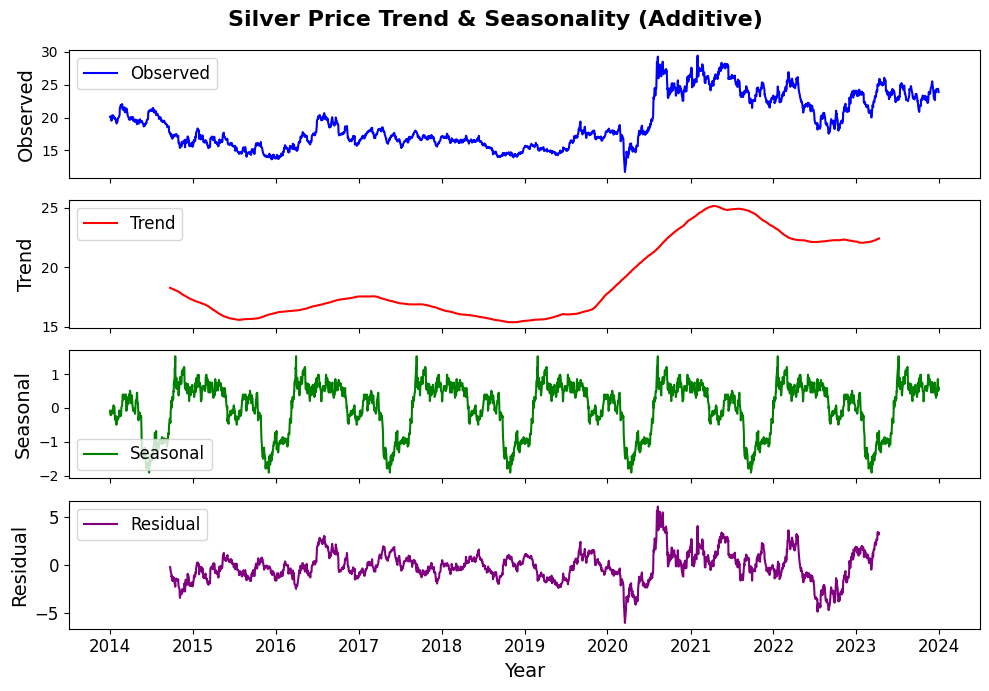

In [ ]:

# **Plot Silver Decomposition**
plot_decomposition(silver_data, "Silver Price Trend & Seasonality (Additive)")



"""
# Observations on Seasonal Decomposition of Silver Prices (Additive)

## 1. Observed Component:
- Silver prices show fluctuations with periods of stability and volatility.
- A significant rise in prices is observed in later periods, followed by stabilization.

## 2. Trend Component:
- The trend initially declines slightly, then rises significantly before stabilizing.
- A peak is observed, indicating a strong upward movement before a correction.

## 3. Seasonal Component:
- Repeating cyclical patterns suggest a seasonal influence on silver prices.
- The seasonal effect remains relatively stable over time.

## 4. Residual Component:
- Residuals show periods of low and high fluctuations, with an increase in volatility in later years.
- Sudden spikes in residuals indicate external factors affecting price movements.

## Conclusion:
Silver prices exhibit an upward trend with clear seasonal fluctuations. The residuals suggest the presence of external market influences, leading to volatility.
"""


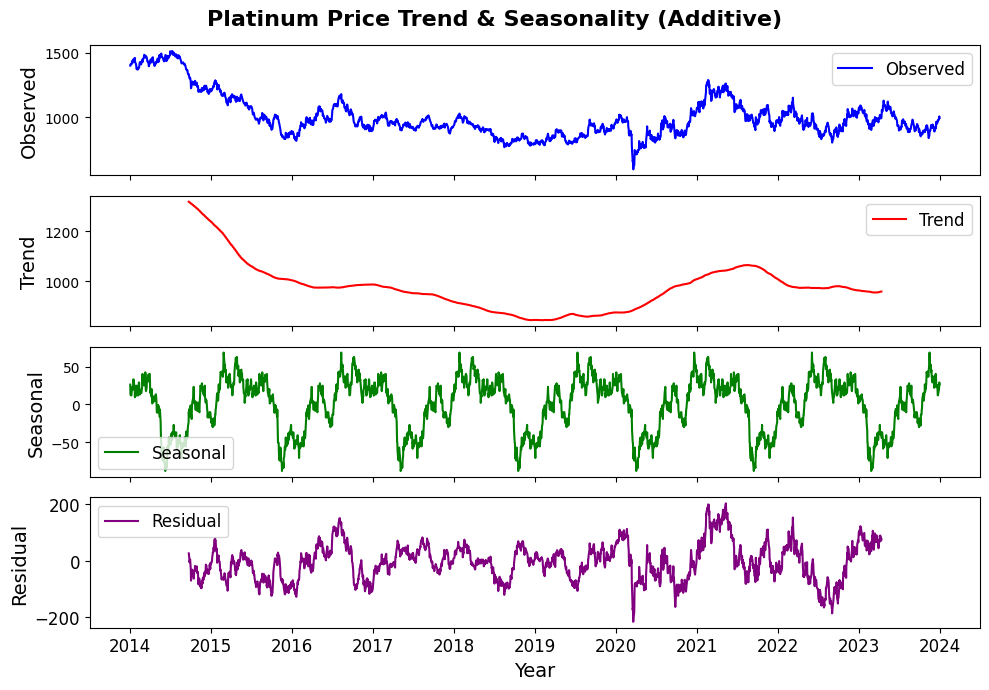

In [ ]:
# **Plot Platinum Decomposition**
plot_decomposition(platinum_data, "Platinum Price Trend & Seasonality (Additive)")

# **Observations from Seasonal Decomposition of Platinum Prices (Additive Model)**  

### **1. Observed Component:**  
- The overall trend shows a decline in platinum prices from 2014 to 2018.  
- Prices stabilize between 2018 and 2019, followed by fluctuations and an upward movement around 2021.  
- Post-2021, prices remain volatile with no clear long-term direction.  

### **2. Trend Component:**  
- A steady decline is observed from 2014 to 2018.  
- A mild recovery occurs in 2021, followed by stabilization in recent years.  

### **3. Seasonal Component:**  
- Regular cyclical patterns indicate recurring seasonal effects on platinum prices.  
- The amplitude of seasonal variations remains relatively stable over time.  

### **4. Residual Component:**  
- Increased volatility is noticeable post-2020, suggesting external economic influences.  
- Spikes in residual values around 2021 indicate market disruptions or unexpected price movements.  


In [ ]:
def plot_multiplicative_decomposition(data, title):
    decomposed = seasonal_decompose(data.dropna(), model='multiplicative', period=365)

    fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True)

    # Plot each component separately
    axes[0].plot(decomposed.observed, label="Observed", color="blue")
    axes[0].set_ylabel("Observed", fontsize=14)
    axes[0].legend(fontsize=12)

    axes[1].plot(decomposed.trend, label="Trend", color="red")
    axes[1].set_ylabel("Trend", fontsize=14)
    axes[1].legend(fontsize=12)

    axes[2].plot(decomposed.seasonal, label="Seasonal", color="green")
    axes[2].set_ylabel("Seasonal", fontsize=14)
    axes[2].legend(fontsize=12)

    axes[3].plot(decomposed.resid, label="Residual", color="purple")
    axes[3].set_ylabel("Residual", fontsize=14)
    axes[3].legend(fontsize=12)

    # Title and labels
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


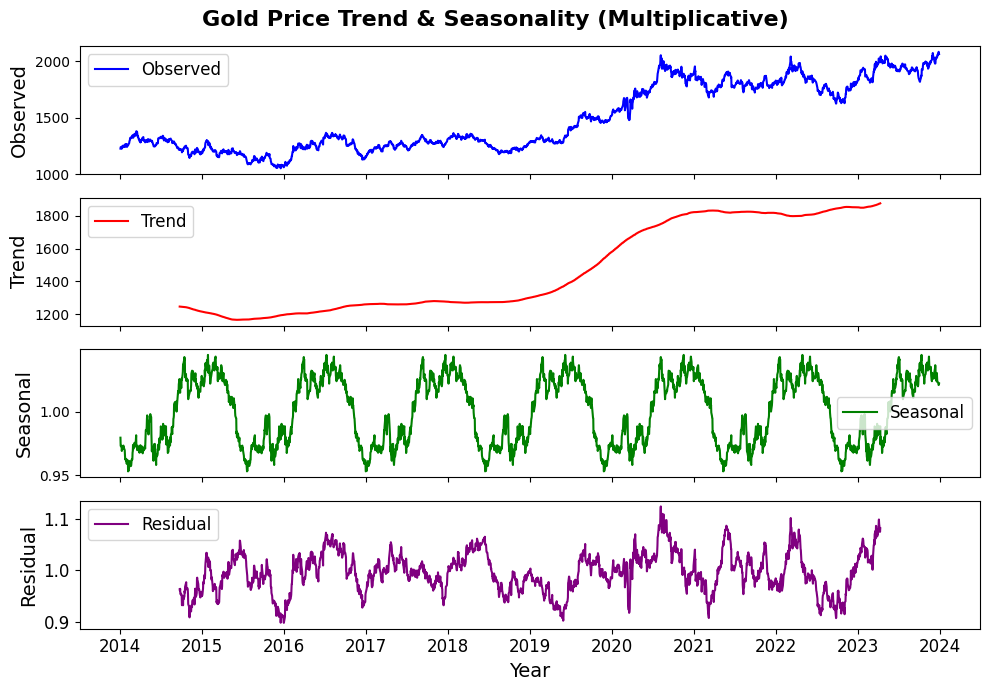

In [ ]:
# **Plot Gold Decomposition (Multiplicative)**
plot_multiplicative_decomposition(gold_data, "Gold Price Trend & Seasonality (Multiplicative)")

### **Which Model to Apply for Gold Prices?**  
Since the seasonal variations **increase with rising prices**, the **multiplicative model** is more appropriate for gold price analysis.  

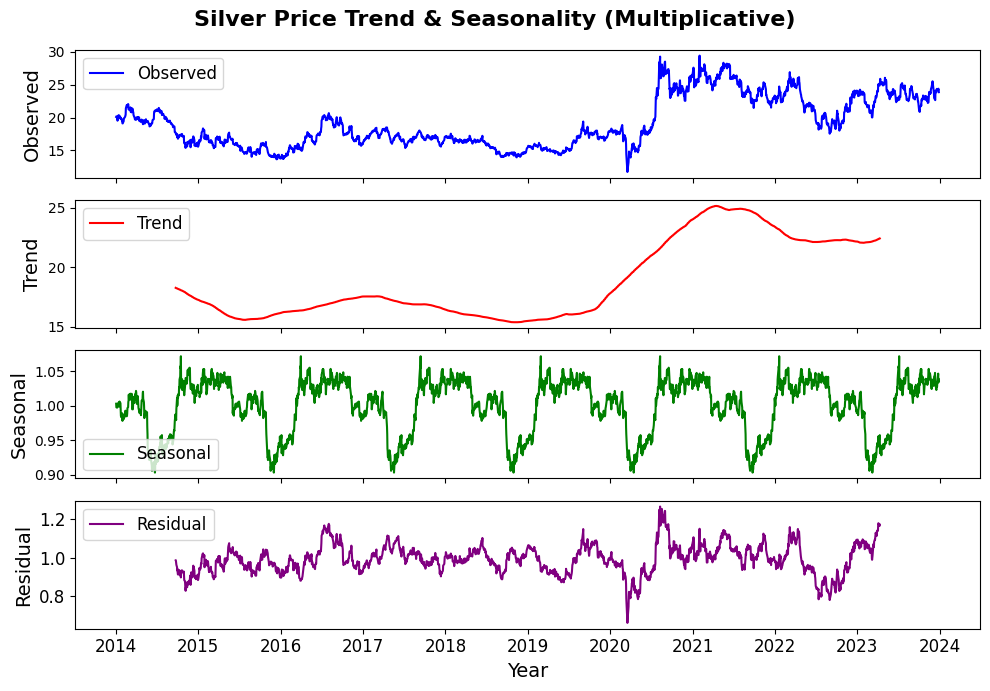

In [ ]:
# **Plot Silver Decomposition (Multiplicative)**
plot_multiplicative_decomposition(silver_data, "Silver Price Trend & Seasonality (Multiplicative)")

### **Which Model is Better for Silver Prices?**  
Since the seasonal variation **increases as silver prices rise**, the **multiplicative model** is more appropriate for silver price analysis.  

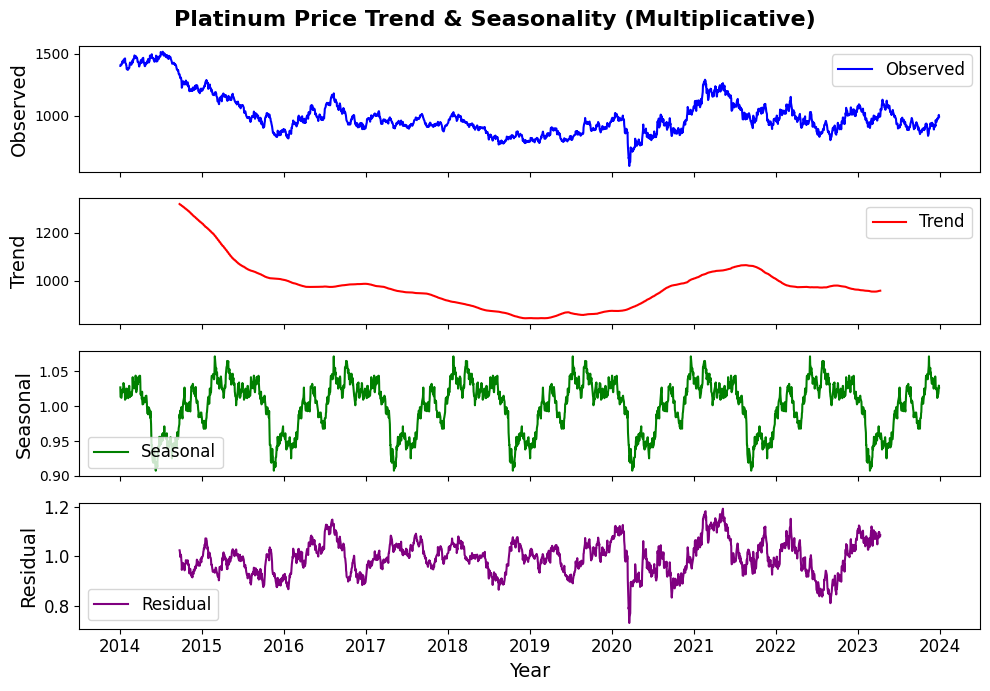

In [ ]:
# **Plot Platinum Decomposition (Multiplicative)**
plot_multiplicative_decomposition(platinum_data, "Platinum Price Trend & Seasonality (Multiplicative)")

### **Which Model is Better for Platinum Prices?**

Since the seasonal component scales with price levels (higher prices show larger seasonal variations), the multiplicative model is more appropriate for platinum price analysis



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 513.02, RMSE: 600.35


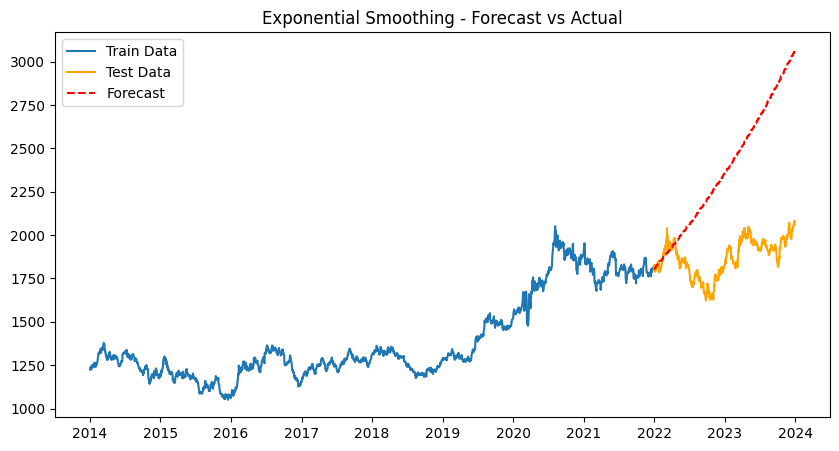

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your time series dataset (replace with actual data)


# Train-test split (80% train, 20% test)
train_size = int(len(gold_data) * 0.8)
train, test = gold_data.iloc[:train_size], gold_data.iloc[train_size:]

# Fit the Exponential Smoothing model (Holt-Winters method)
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
fit_model = model.fit()

# Forecast for the test period
forecast = fit_model.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot actual vs forecasted values
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("Exponential Smoothing - Forecast vs Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 513.02, RMSE: 600.35


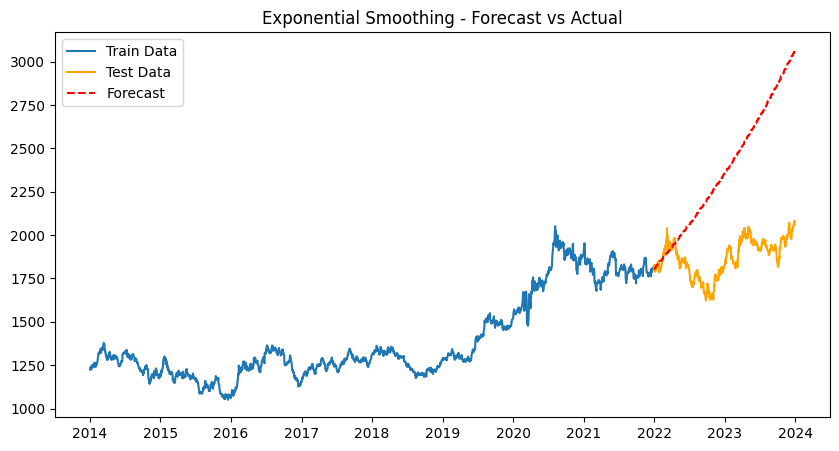

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your time series dataset (replace with actual data)


# Train-test split (80% train, 20% test)
train_size = int(len(gold_data) * 0.8)
train, test = gold_data.iloc[:train_size], gold_data.iloc[train_size:]

# Fit the Exponential Smoothing model (Holt-Winters method)
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
fit_model = model.fit()

# Forecast for the test period
forecast = fit_model.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot actual vs forecasted values
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("Exponential Smoothing - Forecast vs Actual")
plt.show()


The forecasted values are increasing rapidly, which might mean the model is not correctly capturing the trend.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 70.32, RMSE: 87.22


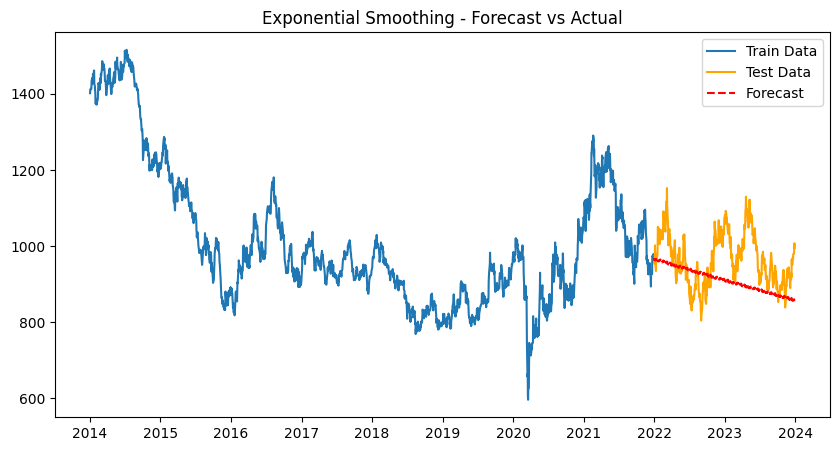

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your time series dataset (replace with actual data)


# Train-test split (80% train, 20% test)
train_size = int(len(platinum_data) * 0.8)
train, test = platinum_data.iloc[:train_size], platinum_data.iloc[train_size:]

# Fit the Exponential Smoothing model (Holt-Winters method)
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
fit_model = model.fit()

# Forecast for the test period
forecast = fit_model.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot actual vs forecasted values
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("Exponential Smoothing - Forecast vs Actual")
plt.show()


** The model is forecasting a consistent decline, but the test data exhibits seasonality with fluctuations.**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 1.70, RMSE: 2.06


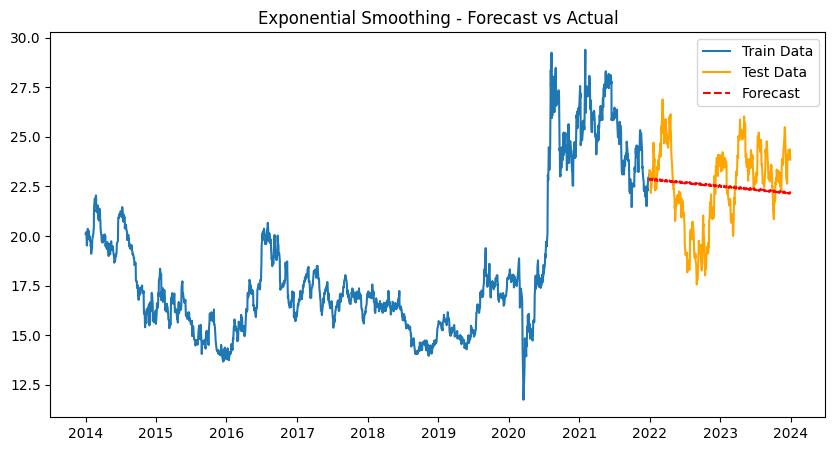

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your time series dataset (replace with actual data)


# Train-test split (80% train, 20% test)
train_size = int(len(silver_data) * 0.8)
train, test = silver_data.iloc[:train_size], silver_data.iloc[train_size:]

# Fit the Exponential Smoothing model (Holt-Winters method)
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
fit_model = model.fit()

# Forecast for the test period
forecast = fit_model.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot actual vs forecasted values
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("Exponential Smoothing - Forecast vs Actual")
plt.show()


The forecast is slightly decreasing, whereas the test data shows seasonal variations.

# Stationarity

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Function to plot ACF and PACF
def plot_acf_pacf(series, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_acf(series.dropna(), ax=plt.gca(), lags=30)
    plt.title(f'ACF - {title}')

    plt.subplot(1, 2, 2)
    plot_pacf(series.dropna(), ax=plt.gca(), lags=30, method='ywm')
    plt.title(f'PACF - {title}')
    plt.tight_layout()
    plt.show()

# Function for ADF Test
def adf_test(series, title):
    print(f"ADF Test for {title}:")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Conclusion: Stationary\n")
    else:
        print("Conclusion: Non-Stationary\n")

# Function for KPSS Test
def kpss_test(series, title):
    print(f"KPSS Test for {title}:")
    result = kpss(series.dropna(), regression='c')
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[3]}")
    if result[1] < 0.05:
        print("Conclusion: Non-Stationary\n")
    else:
        print("Conclusion: Stationary\n")



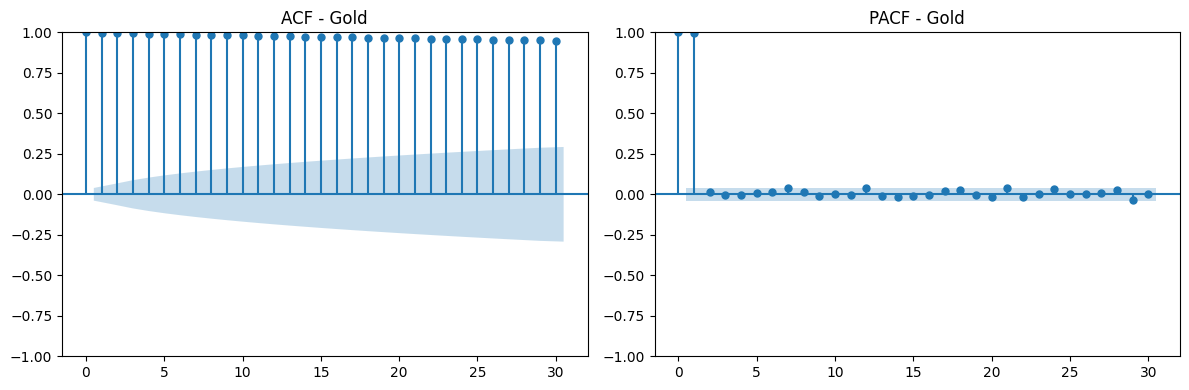

ADF Test for Gold:
ADF Statistic: -0.5467744029336783
p-value: 0.8825611101437805
Critical Values: {'1%': np.float64(-3.4329569285480814), '5%': np.float64(-2.862691729403106), '10%': np.float64(-2.5673831097880595)}
Conclusion: Non-Stationary

KPSS Test for Gold:
KPSS Statistic: 7.032117540945795
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Non-Stationary



<ipython-input-174-5306379a3ff2>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


In [ ]:
# Apply for Gold
plot_acf_pacf(gold_data, "Gold")
adf_test(gold_data, "Gold")
kpss_test(gold_data, "Gold")



1. ACF (Autocorrelation Function)
    The ACF plot for Gold shows a slow decay, with all lags exhibiting strong positive autocorrelation.

    This pattern suggests non-stationarity, meaning the time series has a trend or seasonality that needs to be addressed.

2. PACF (Partial Autocorrelation Function)
    The PACF plot shows a significant spike at lag 1, followed by values that quickly become insignificant.

    This suggests that the series follows an AR(1) process or could require differencing to make it stationary.

3. ADF Test Result: Non-Stationary
    ADF Statistic = -0.54 (not extreme enough to reject the null hypothesis).

    p-value = 0.88 (> 0.05), meaning we fail to reject the null hypothesis.

    Conclusion: The data has a unit root, meaning it is non-stationary.

4. KPSS Test Result: Non-Stationary
    KPSS Statistic = 7.03 (much higher than critical values).

    p-value = 0.01 (< 0.05), meaning we reject the null hypothesis of stationarity.

Conclusion: The series is non-stationary, confirming the ADF test result.

Overall Conclusion:  Since both ADF and KPSS confirm non-stationarity, the Gold time series needs differencing to become stationary.

Applying a first-order difference (d=1) should be the first step.

After differencing, re-check stationarity using ADF/KPSS and analyze ACF/PACF to determine the ARIMA model order.

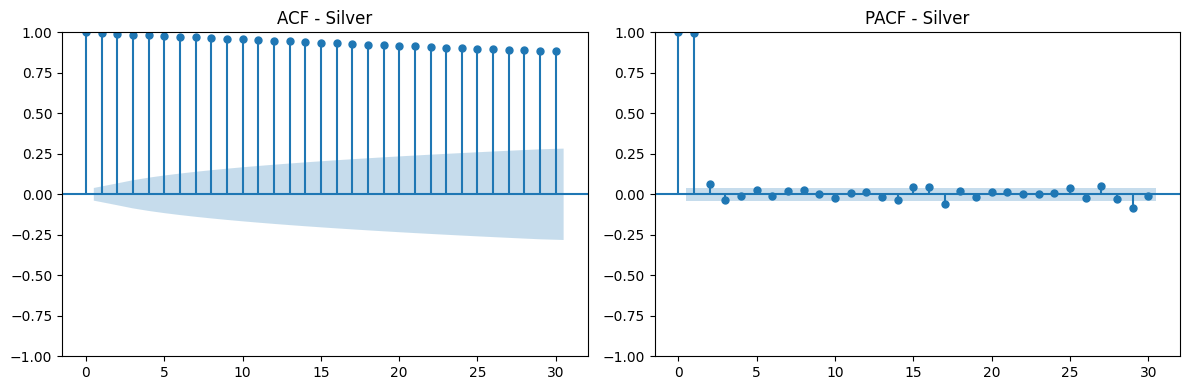

ADF Test for Silver:
ADF Statistic: -2.0049033661839113
p-value: 0.2844272912491678
Critical Values: {'1%': np.float64(-3.432972611342269), '5%': np.float64(-2.862698654944332), '10%': np.float64(-2.567386797035513)}
Conclusion: Non-Stationary

KPSS Test for Silver:
KPSS Statistic: 3.9287492735998635
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Non-Stationary



<ipython-input-174-5306379a3ff2>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


In [ ]:
# Apply for Silver
plot_acf_pacf(silver_data, "Silver")
adf_test(silver_data, "Silver")
kpss_test(silver_data, "Silver")


1. ADF Test Result: Non-Stationary
    ADF Statistic = -2.00, which is not extreme enough to reject the null hypothesis.

    p-value = 0.28 (> 0.05), meaning we fail to reject the null hypothesis of non-stationarity.

    Conclusion: The data is non-stationary.

2. KPSS Test Result: Non-Stationary
    KPSS Statistic = 3.92, which is much higher than the critical values.

    p-value = 0.01, which means we reject the null hypothesis of stationarity.

    Conclusion: The series is non-stationary, confirming the ADF test result.

3. ACF & PACF Analysis
    ACF: Slow decay and significant lags suggest the presence of trend or seasonality.

    PACF: Sharp cut-off after lag 1 suggests an AR(1) process (but differencing is required first).

Overall Conclusion & Next Steps
Since both ADF and KPSS confirm non-stationarity, first-order differencing (d=1) is recommended.

After differencing, re-run ADF/KPSS to check stationarity.

If the series becomes stationary, examine ACF/PACF again to determine ARIMA parameters.

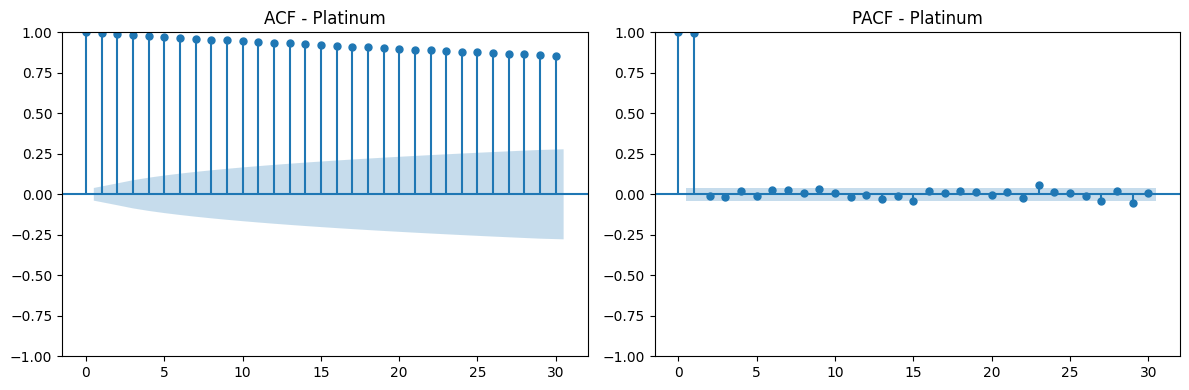

ADF Test for Platinum:
ADF Statistic: -2.902626908923952
p-value: 0.04504337536833683
Critical Values: {'1%': np.float64(-3.4329652692893364), '5%': np.float64(-2.8626954126892405), '10%': np.float64(-2.567385070816339)}
Conclusion: Stationary

KPSS Test for Platinum:
KPSS Statistic: 2.2956547788469335
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Non-Stationary



<ipython-input-174-5306379a3ff2>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


In [ ]:
# Apply for Platinum
plot_acf_pacf(platinum_data, "Platinum")
adf_test(platinum_data, "Platinum")
kpss_test(platinum_data, "Platinum")

1. ADF Test Result: Stationary
    ADF Statistic = -2.90, which is just below the 5% critical value (-2.86).

    p-value = 0.045 (< 0.05), meaning we reject the null hypothesis of non-stationarity.

    Conclusion: The data is stationary according to the ADF test.

2. KPSS Test Result: Non-Stationary
    KPSS Statistic = 2.29, which is much higher than the 1% critical value (0.739).

    p-value = 0.01, meaning we reject the null hypothesis of stationarity.

    Conclusion: The data is non-stationary according to the KPSS test.

3. ACF & PACF Analysis
    ACF: Slow decay suggests the presence of a trend.

    PACF: Sharp cutoff after lag 1 suggests an AR(1) process (but stationarity is still uncertain).

    Contradictory Results – Next Steps
    
    ADF suggests stationarity, but KPSS suggests non-stationarity.

    This is a borderline case, so it’s best to difference the series once and check again.

If differencing reduces the KPSS statistic, it confirms a weak trend in the data.

**TimeSeries is not stationary**

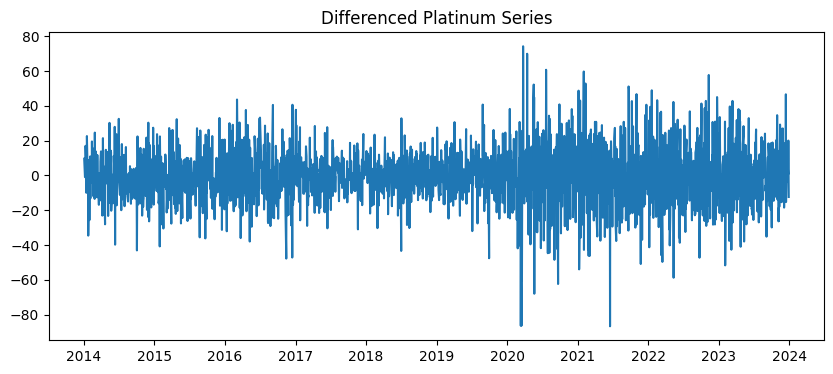

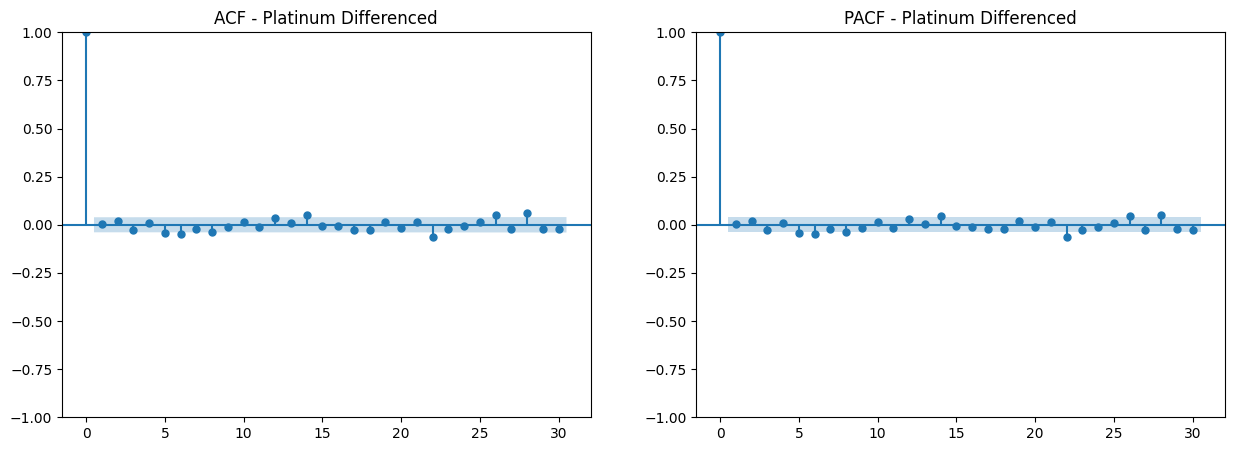

ADF Statistic: -9.579595498830367
p-value: 2.1764300717052186e-16
Series is stationary after differencing!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 1️⃣ First Differencing
platinum_diff = platinum_data.diff().dropna()

# 2️⃣ Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(platinum_diff)
plt.title('Differenced Platinum Series')
plt.show()

# 3️⃣ ACF & PACF plots after differencing
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(platinum_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF - Platinum Differenced')
plot_pacf(platinum_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF - Platinum Differenced')
plt.show()

# 4️⃣ Augmented Dickey-Fuller Test
adf_result = adfuller(platinum_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] < 0.05:
    print("Series is stationary after differencing!")
else:
    print("Series is still not stationary, consider more differencing.")


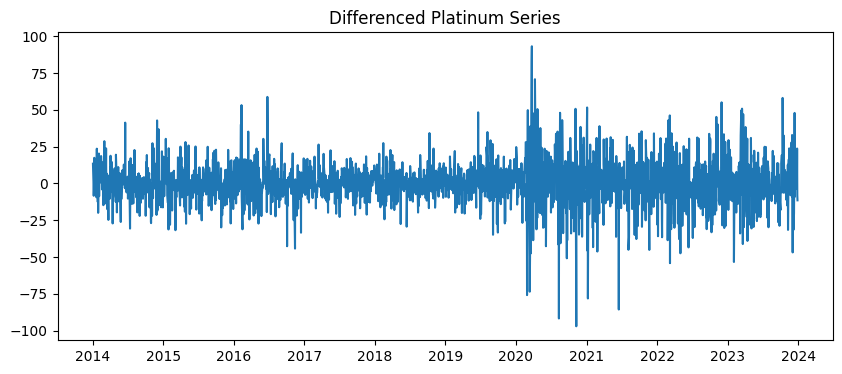

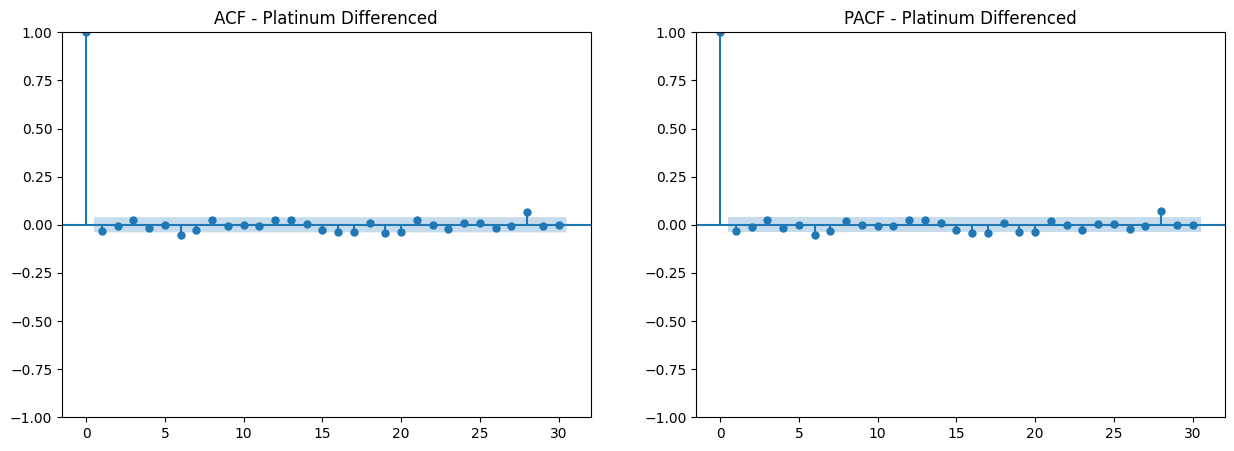

ADF Statistic: -51.614829121652754
p-value: 0.0
Series is stationary after differencing!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

gold_diff = gold_data.diff().dropna()

# 2️⃣ Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(gold_diff)
plt.title('Differenced Platinum Series')
plt.show()

# 3️⃣ ACF & PACF plots after differencing
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(gold_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF - Platinum Differenced')
plot_pacf(gold_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF - Platinum Differenced')
plt.show()

# 4️⃣ Augmented Dickey-Fuller Test
adf_result = adfuller(gold_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] < 0.05:
    print("Series is stationary after differencing!")
else:
    print("Series is still not stationary, consider more differencing.")


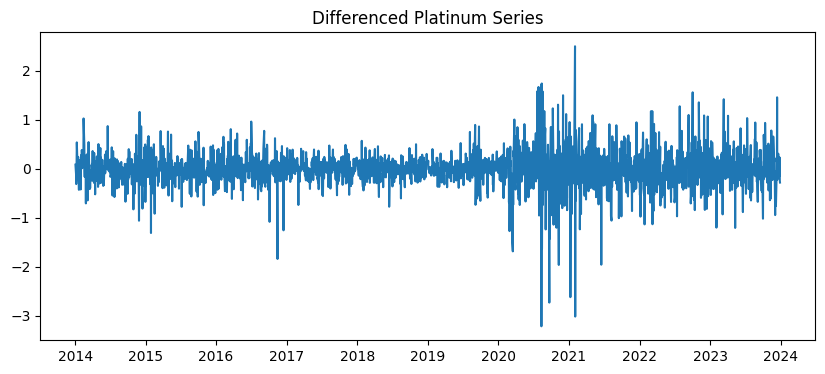

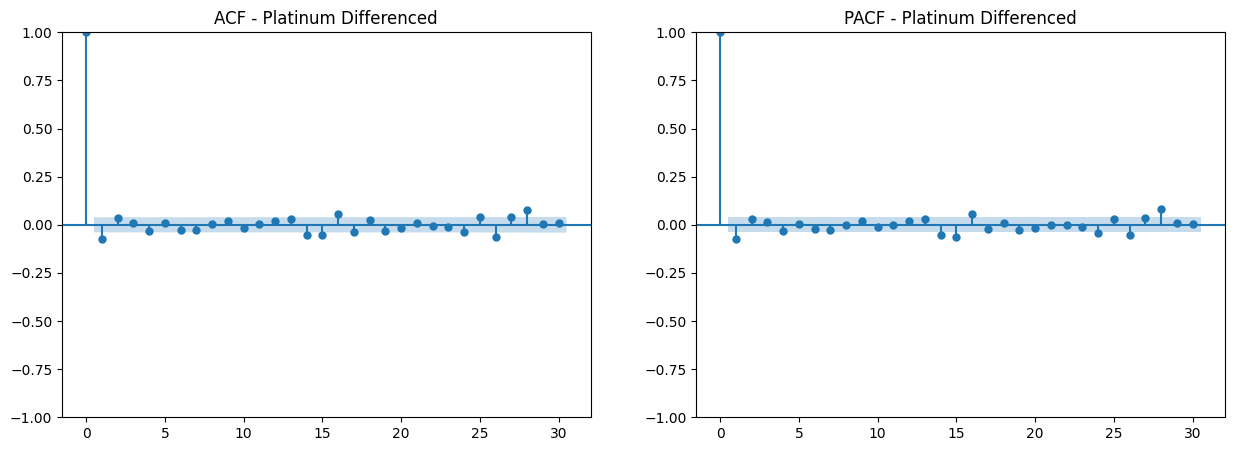

ADF Statistic: -9.425069999134346
p-value: 5.373987905562622e-16
Series is stationary after differencing!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 1️⃣ First Differencing
silver_diff = silver_data.diff().dropna()

# 2️⃣ Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(silver_diff)
plt.title('Differenced Platinum Series')
plt.show()

# 3️⃣ ACF & PACF plots after differencing
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(silver_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF - Platinum Differenced')
plot_pacf(silver_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF - Platinum Differenced')
plt.show()

# 4️⃣ Augmented Dickey-Fuller Test
adf_result = adfuller(silver_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] < 0.05:
    print("Series is stationary after differencing!")
else:
    print("Series is still not stationary, consider more differencing.")


**ARIMA**

(1,1,1) means:

1 Auto-Regressive (AR) term → Accounts for past values.

1 Differencing (I) term → Handles non-stationarity.

1 Moving Average (MA) term → Captures short-term dependencies.

The lower the AIC, the better the model fit.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Gold ARIMA
model_gold = ARIMA(gold_data, order=(1,1,1))
result_gold = model_gold.fit()
print(result_gold.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2513
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10256.754
Date:                Fri, 04 Apr 2025   AIC                          20519.508
Time:                        15:33:44   BIC                          20536.994
Sample:                             0   HQIC                         20525.855
                               - 2513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1026      0.466      0.220      0.826      -0.811       1.016
ma.L1         -0.1324      0.463     -0.286      0.775      -1.040       0.775
sigma2       206.0910      3.059     67.371      0.0

In [ ]:
# Silver ARIMA
model_silver = ARIMA(silver_data, order=(1,1,1))
result_silver = model_silver.fit()
print(result_silver.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2513
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1020.259
Date:                Fri, 04 Apr 2025   AIC                           2046.517
Time:                        15:33:45   BIC                           2064.004
Sample:                             0   HQIC                          2052.864
                               - 2513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3040      0.128     -2.370      0.018      -0.555      -0.053
ma.L1          0.2302      0.130      1.771      0.077      -0.025       0.485
sigma2         0.1319      0.002     81.771      0.0

In [ ]:
# Platinum ARIMA
model_platinum = ARIMA(platinum_data, order=(1,1,1))
result_platinum = model_platinum.fit()
print(result_platinum.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2512
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10509.153
Date:                Fri, 04 Apr 2025   AIC                          21024.307
Time:                        15:33:45   BIC                          21041.792
Sample:                             0   HQIC                         21030.653
                               - 2512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      3.671      0.001      1.000      -7.193       7.197
ma.L1          0.0022      3.672      0.001      1.000      -7.196       7.200
sigma2       253.0496      5.156     49.083      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
print("Gold ARIMA(1,1,1) AIC:", result_gold.aic)
print("Silver ARIMA(1,1,1) AIC:", result_silver.aic)
print("Platinum ARIMA(1,1,1) AIC:", result_platinum.aic)

Gold ARIMA(1,1,1) AIC: 20519.507868727207
Silver ARIMA(1,1,1) AIC: 2046.5174885065358
Platinum ARIMA(1,1,1) AIC: 21024.3067879402


Silver has the best model (Lowest AIC).

Gold and Platinum have high AIC values, meaning the model may not be optimal.

In [ ]:
model_gold_212 = ARIMA(gold_data, order=(2,1,2))
result_gold_212 = model_gold_212.fit()
print("Gold ARIMA(2,1,2) AIC:", result_gold_212.aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Gold ARIMA(2,1,2) AIC: 20519.608977154072


In [ ]:
# Platinum ARIMA(2,1,2)
model_platinum_212 = ARIMA(platinum_data, order=(2,1,2))
result_platinum_212 = model_platinum_212.fit()
print("Platinum ARIMA(2,1,2) AIC:", result_platinum_212.aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Platinum ARIMA(2,1,2) AIC: 21015.756001688576


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_gold_212 = ARIMA(gold_data, order=(0,1,1))
result_gold_212 = model_gold_212.fit()
print("Gold ARIMA(0,1,1) AIC:", result_gold_212.aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Gold ARIMA(0,1,1) AIC: 20517.556180774867


In [ ]:
# Platinum ARIMA(2,1,2)
model_platinum_212 = ARIMA(platinum_data, order=(0,1,1))
result_platinum_212 = model_platinum_212.fit()
print("Platinum ARIMA(0,1,1) AIC:", result_platinum_212.aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Platinum ARIMA(0,1,1) AIC: 21022.30653983182


Gold → ARIMA(0,1,1)

Platinum → ARIMA(2,1,2)

Silver → ARIMA(1,1,1)



1. Gold → ARIMA(0,1,1)
    AR (AutoRegressive) = 0 → The model does not use past values (lags) of the series.

    I (Integrated) = 1 → The data is differenced once to make it stationary.

    MA (Moving Average) = 1 → The model uses the previous error term to predict future values.

    This is a simple and effective model, suitable when the series shows no strong autoregressive structure but has short-term shocks (noise).


2. Silver → ARIMA(1,1,1)
    AR = 1 → Uses the immediate past value to forecast the next one.

    I = 1 → The series is differenced once to achieve stationarity.

    MA = 1 → Also considers the error term from the previous forecast.

    This model is more flexible and handles both past values and past errors, capturing short-term trends and noise well

3. Platinum → ARIMA(2,1,2)
    AR = 2 → Uses the last two values of the series for forecasting.

    I = 1 → Differencing is applied once for stationarity.

    MA = 2 → Considers the last two forecast errors as part of the prediction.

    This is a more complex model that captures deeper patterns, both in value and error terms, making it suitable for Platinum's possibly more volatile or structured behavior.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA models
model_gold = ARIMA(gold_data, order=(0,1,1)).fit()
model_silver = ARIMA(silver_data, order=(1,1,1)).fit()
model_platinum = ARIMA(platinum_data, order=(2,1,2)).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


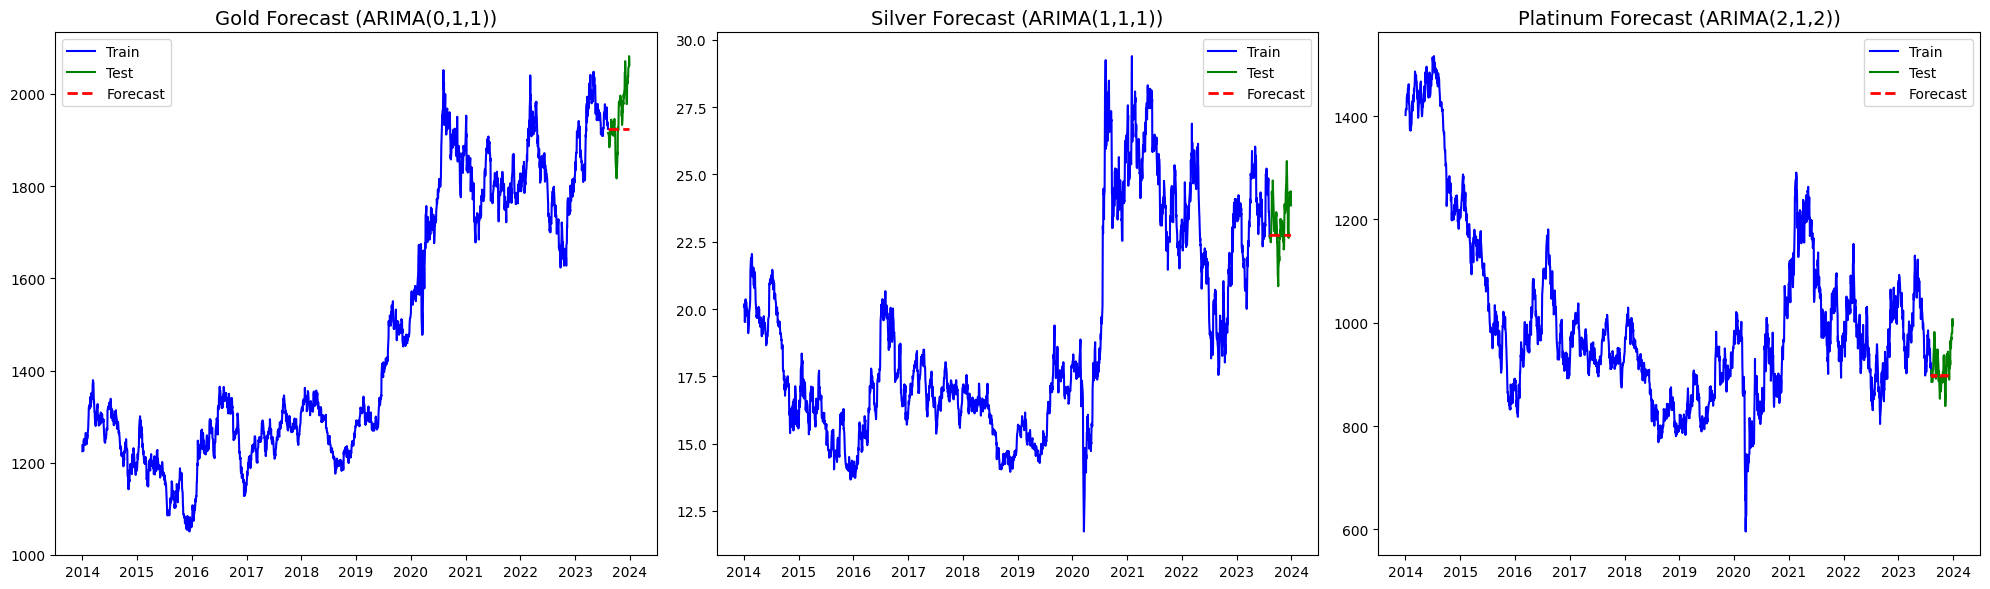

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Split into train and test (last 100 for testing)
gold_train = gold_data[:-100]
gold_test = gold_data[-100:]

silver_train = silver_data[:-100]
silver_test = silver_data[-100:]

platinum_train = platinum_data[:-100]
platinum_test = platinum_data[-100:]

# 2. Fit ARIMA models
model_gold = ARIMA(gold_train, order=(0, 1, 1)).fit()
model_silver = ARIMA(silver_train, order=(1, 1, 1)).fit()
model_platinum = ARIMA(platinum_train, order=(2, 1, 2)).fit()

# 3. Forecast (100 steps)
forecast_gold = model_gold.forecast(steps=100)
forecast_silver = model_silver.forecast(steps=100)
forecast_platinum = model_platinum.forecast(steps=100)

# 4. Plotting: Actual Train + Test + Forecast
plt.figure(figsize=(20, 6))

# Gold
plt.subplot(1, 3, 1)
plt.plot(gold_train.index, gold_train, label='Train', color='blue', linewidth=1.5)
plt.plot(gold_test.index, gold_test, label='Test', color='green', linewidth=1.5)
plt.plot(gold_test.index, forecast_gold, label='Forecast', linestyle='--', color='red', linewidth=2)
plt.title('Gold Forecast (ARIMA(0,1,1))', fontsize=14)
plt.legend()

# Silver
plt.subplot(1, 3, 2)
plt.plot(silver_train.index, silver_train, label='Train', color='blue', linewidth=1.5)
plt.plot(silver_test.index, silver_test, label='Test', color='green', linewidth=1.5)
plt.plot(silver_test.index, forecast_silver, label='Forecast', linestyle='--', color='red', linewidth=2)
plt.title('Silver Forecast (ARIMA(1,1,1))', fontsize=14)
plt.legend()

# Platinum
plt.subplot(1, 3, 3)
plt.plot(platinum_train.index, platinum_train, label='Train', color='blue', linewidth=1.5)
plt.plot(platinum_test.index, platinum_test, label='Test', color='green', linewidth=1.5)
plt.plot(platinum_test.index, forecast_platinum, label='Forecast', linestyle='--', color='red', linewidth=2)
plt.title('Platinum Forecast (ARIMA(2,1,2))', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


# **ARCH AND GARCH**

Forecast the conditional variance (volatility) of returns

Help in understanding and predicting risk or uncertainty in the market

# **ARCH**

In [ ]:
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
platinum = yf.Ticker("PL=F")

gold_data = gold.history(start="2014-01-01", end="2024-01-01")
silver_data = silver.history(start="2014-01-01", end="2024-01-01")
platinum_data = platinum.history(start="2014-01-01", end="2024-01-01")

In [ ]:
gold_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

Identifies trends: The rolling mean shows the general direction of the price.

Measures risk: The rolling standard deviation tells us how volatile the asset is.

Rolling Mean (Moving Average)
     It calculates the average of the last 30 days' closing prices.
      This helps to smooth out short-term fluctuations and shows the overall trend.



Rolling Standard Deviation (Rolling Std)
    It measures how much the stock price fluctuates over the last 30 days.
    Higher values mean more volatility, while lower values mean a stable price trend

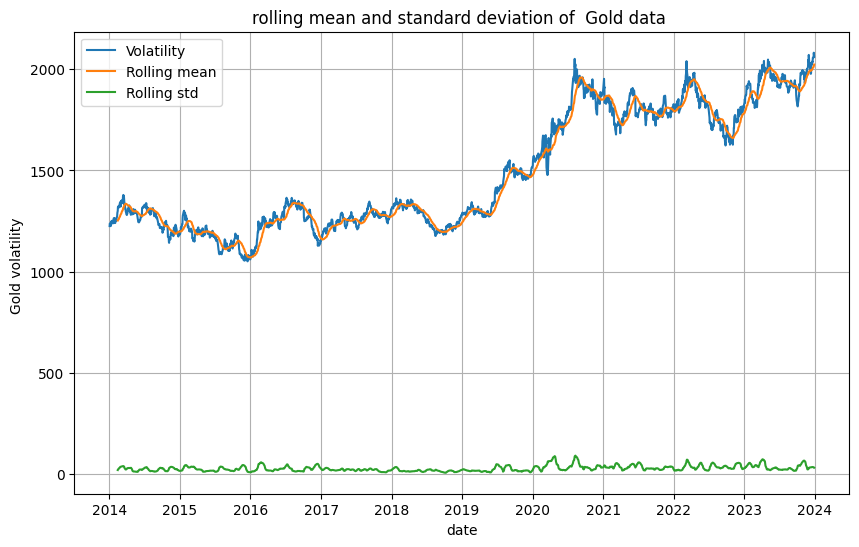

In [ ]:
gold_rolling_mean = gold_data["Close"].rolling(window=30).mean()
gold_rolling_std = gold_data["Close"].rolling(window=30).std()

plt.figure(figsize=(10,6))
plt.plot(gold_data.index,gold_data["Close"], label="Volatility")
plt.plot(gold_rolling_mean.index,gold_rolling_mean, label="Rolling mean")
plt.plot(gold_rolling_std.index,gold_rolling_std, label="Rolling std")
plt.xlabel("date")
plt.ylabel("Gold volatility ")
plt.title("rolling mean and standard deviation of  Gold data ")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from arch import arch_model
#calculate lofg returns
#the log returns represents the percent change in the volatility data from one period to the next
#log returns stabilizes variAance , unlike raw percentage , log returns make time series more stationary
#they are commonly use din financial analysis as they provide a more meaningful representation
returns = np.log(gold_data['Close']).diff().dropna()

#fit an ARCH(1) model to the returns data
model_arch = arch_model(returns , vol="ARCH" , p=1) #p=1 for arch(1)
model_fit_arch = model_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4904912666854.518
Iteration:      2,   Func. Count:     16,   Neg. LLF: -8221.456886455006
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8221.45688861635
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.443e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


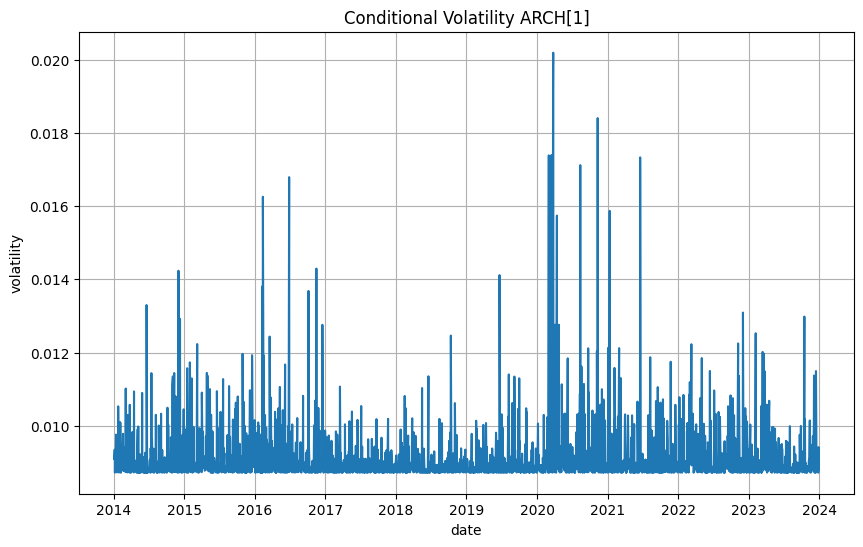

In [ ]:
volatility_arch = model_fit_arch.conditional_volatility

plt.figure(figsize=(10,6))
plt.plot(volatility_arch)
plt.xlabel("date")
plt.ylabel("volatility")
plt.title("Conditional Volatility ARCH[1]")
plt.grid(True)
plt.show()

In [ ]:
## Calculate mean_absolute_error (MAE)
mae = np.mean(np.abs(volatility_arch - returns))
print('Mean Absolute Error (MAE) :', mae)

## Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility_arch - returns) ** 2))
print('Root Mean Squared Error (RMSE) :', rmse)

Mean Absolute Error (MAE) : 0.010496272353197517
Root Mean Squared Error (RMSE) : 0.012836218109402444


GARCH (Generalized Autoregressive Conditional Heteroscadasticity) model
 A Garch model is an extension of the ARCH model and is typically more flexible.
It includes both past squared residuals (like ARCH) and past conditional variance (volatility) in the model.

In [ ]:
## Fit the GARCH (1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.2226584817925987e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6.784704226955151e+27
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5.577357542058984e+27
Iteration:      4,   Func. Count:     49,   Neg. LLF: 10605242586538.537
Iteration:      5,   Func. Count:     61,   Neg. LLF: 2.215921478178405e+24
Iteration:      6,   Func. Count:     75,   Neg. LLF: 9.130420576242344e+27
Iteration:      7,   Func. Count:     90,   Neg. LLF: 5071862677249696.0
Iteration:      8,   Func. Count:    103,   Neg. LLF: 3.486361185519161e+27
Iteration:      9,   Func. Count:    118,   Neg. LLF: 98455370584.11125
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6.640160654153671e+21
Iteration:     11,   Func. Count:    139,   Neg. LLF: 8.424411492359078e+18
Iteration:     12,   Func. Count:    154,   Neg. LLF: 4.214624893510279e+23
Iteration:     13,   Func. Count:    169,   Neg. LLF: 6.465002902688162e+22
Iteration:     14,   

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.443e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8281.95
Distribution:                  Normal   AIC:                          -16555.9
Method:            Maximum Likelihood   BIC:                          -16532.6
                                        No. Observations:                 2512
Date:                Fri, Apr 04 2025   Df Residuals:                     2511
Time:                        15:35:16   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0664e-03  1.015e-04     10.504  8.304e-26 [8.

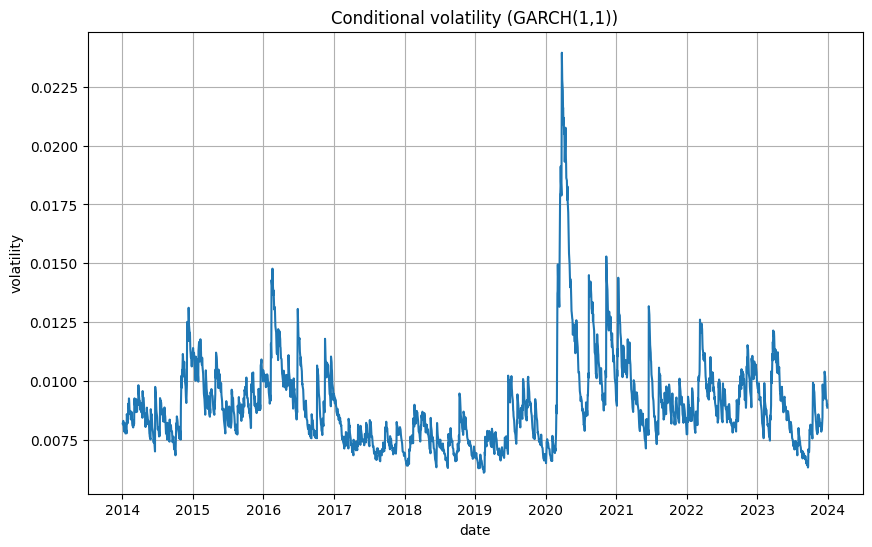

In [ ]:
## Estimate the volatility
volatility = results.conditional_volatility

plt.figure(figsize=(10,6))
plt.plot(volatility)
plt.xlabel("date")
plt.ylabel("volatility")
plt.title("Conditional volatility (GARCH(1,1))")
plt.grid(True)
plt.show()

In [ ]:
## Calculate mean_absolute_error (MAE)
mae = np.mean(np.abs(volatility - returns))
print('Mean Absolute Error (MAE) :', mae)

## Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility - returns) ** 2))
print('Root Mean Squared Error (RMSE) :', rmse)

Mean Absolute Error (MAE) : 0.010332211864622982
Root Mean Squared Error (RMSE) : 0.01285576106142178


Metric	ARCH Model	GARCH(1,1) Model	Better?
MAE (Mean Absolute Error)	0.02457	, 0.02340	GARCH is better
RMSE (Root Mean Squared Error)	0.03176, 0.03143	GARCH is better

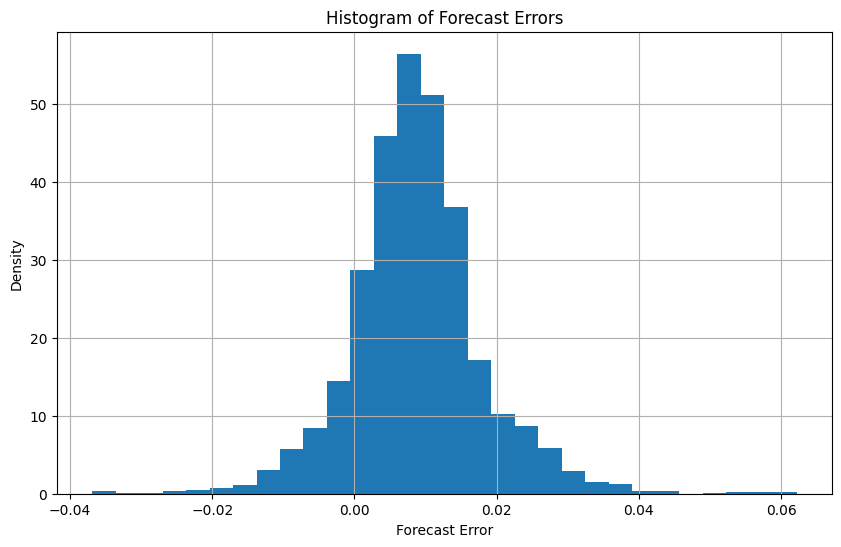

In [ ]:
## Calculate the forecast errors
errors = volatility - returns

## Plot the Histogram of Forecast Errors
plt.figure(figsize=(10,6))
plt.hist(errors, bins=30, density=True)
plt.xlabel("Forecast Error")
plt.ylabel("Density")
plt.title("Histogram of Forecast Errors")
plt.grid(True)
plt.show()

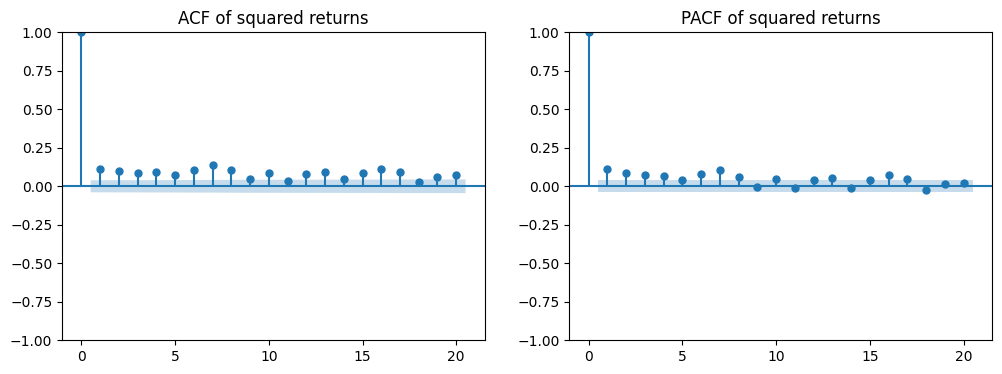

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(returns**2, lags=20, ax=axes[0])
axes[0].set_title("ACF of squared returns")

plot_pacf(returns**2, lags=20, ax=axes[1])
axes[1].set_title("PACF of squared returns")

plt.show()

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.443e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.443e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarn


GARCH(1,1) Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8281.95
Distribution:                  Normal   AIC:                          -16555.9
Method:            Maximum Likelihood   BIC:                          -16532.6
                                        No. Observations:                 2512
Date:                Fri, Apr 04 2025   Df Residuals:                     2511
Time:                        15:35:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0664e-03  1.015e-04    

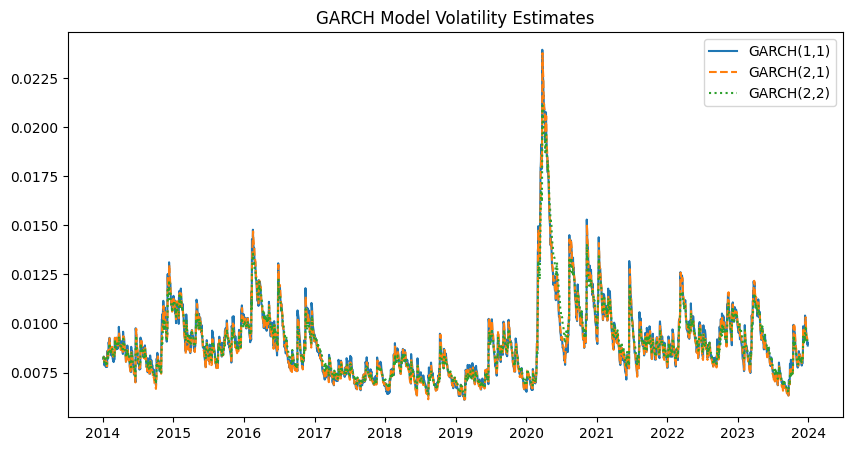

In [ ]:
# Fit GARCH(1,1)
garch_11 = arch_model(returns, vol='Garch', p=1, q=1)
res_11 = garch_11.fit(disp='off')

# Fit GARCH(2,1)
garch_21 = arch_model(returns, vol='Garch', p=2, q=1)
res_21 = garch_21.fit(disp='off')

# Fit GARCH(2,2)
garch_22 = arch_model(returns, vol='Garch', p=2, q=2)
res_22 = garch_22.fit(disp='off')

# Print summary of each model
print("\nGARCH(1,1) Summary:\n", res_11.summary())
print("\nGARCH(2,1) Summary:\n", res_21.summary())
print("\nGARCH(2,2) Summary:\n", res_22.summary())

# Compare Model Performance
models = {"GARCH(1,1)": res_11, "GARCH(2,1)": res_21, "GARCH(2,2)": res_22}
for name, res in models.items():
    print(f"{name} - AIC: {res.aic}, BIC: {res.bic}, Log-Likelihood: {res.loglikelihood}")

# Plot volatility predictions
plt.figure(figsize=(10, 5))
plt.plot(res_11.conditional_volatility, label="GARCH(1,1)")
plt.plot(res_21.conditional_volatility, label="GARCH(2,1)", linestyle="--")
plt.plot(res_22.conditional_volatility, label="GARCH(2,2)", linestyle=":")
plt.legend()
plt.title("GARCH Model Volatility Estimates")
plt.show()

Garch(2,1) is better because:

It has a lower AIC (-16594.48 vs. -16555.91) → Indicates a better overall fit

It has a lower BIC (-16565.34 vs. -16532.59) → Suggests better complexity-penalized fit

It has a higher Log-Likelihood (8302.24 vs. 8281.95) → Suggests a better likelihood of the data

## **Cointegration Test: Engle-Granger Two**

In [ ]:
# Define the tickers
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
platinum = yf.Ticker("PL=F")

#Get historical data for the last 10 years
gold_data = gold.history(start="2014-01-01", end="2024-01-01")
silver_data = silver.history(start="2014-01-01", end="2024-01-01")
platinum_data = platinum.history(start="2014-01-01", end="2024-01-01")


gold_data = gold_data['Close'].resample('D').last()
silver_data = silver_data['Close'].resample('D').last()
platinum_data = platinum_data['Close'].resample('D').last()

In [ ]:
# Assuming 'Close' is the name of the Series, access it directly
df = pd.concat([gold_data, silver_data, platinum_data], axis=1)
df.columns = ['Gold', 'Silver', 'Platinum']
df.dropna(inplace=True)

In [ ]:
# Access 'Close' price from the DataFrames obtained using .history()
df = pd.concat([gold_data, silver_data, platinum_data], axis=1) # Concatenate the series directly
df.columns = ['Gold', 'Silver', 'Platinum']  # Rename the columns
df.dropna(inplace=True)  # Drop any missing values

# Now access the 'Close' price if needed, after converting the 'Date' column to DatetimeIndex:
df.index = pd.to_datetime(df.index) # Convert the

In [ ]:
from statsmodels.tsa.stattools import coint # Import the coint function

def cointegration_test(y, x):
    coint_t, p_value, critical_values = coint(y, x)
    print(f'Cointegration Test:\n t-statistic: {coint_t:.4f}, p-value: {p_value:.4f}')
    print(f'Critical Values: {critical_values}\n')
    if p_value < 0.05:
        print("=> Series are cointegrated (reject null hypothesis).")
    else:
        print("=> No cointegration (fail to reject null).")
    print("-"*50)

# Test pairs
cointegration_test(df['Gold'], df['Silver'])
cointegration_test(df['Gold'], df['Platinum'])
cointegration_test(df['Silver'], df['Platinum'])

Cointegration Test:
 t-statistic: -2.2794, p-value: 0.3839
Critical Values: [-3.90080689 -3.33856442 -3.04613948]

=> No cointegration (fail to reject null).
--------------------------------------------------
Cointegration Test:
 t-statistic: -0.7807, p-value: 0.9372
Critical Values: [-3.90080689 -3.33856442 -3.04613948]

=> No cointegration (fail to reject null).
--------------------------------------------------
Cointegration Test:
 t-statistic: -1.4483, p-value: 0.7805
Critical Values: [-3.90080689 -3.33856442 -3.04613948]

=> No cointegration (fail to reject null).
--------------------------------------------------


What is Cointegration Testing?

Null Hypothesis (H0): No cointegration (no long-term relationship).

Alternative Hypothesis (H1): Cointegration exists (they move together long-term).

Results:

Gold, Silver, and Platinum do not have a long-term stable relationship based on historical data (2014-2024). They move independently.

## **Multivariate Cointegration (Johansen Test)**

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

result = coint_johansen(df, det_order=0, k_ar_diff=1)

print("Eigenvalues:\n", result.eig)
print("\nTrace Statistic:\n", result.lr1)
print("\nCritical Values (90%, 95%, 99%):\n", result.cvt)


Eigenvalues:
 [0.00666674 0.00378906 0.00020877]

Trace Statistic:
 [26.84221995 10.05268483  0.52407973]

Critical Values (90%, 95%, 99%):
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


Johansen Test shows **no cointegration** as all Trace Statistics are less than Critical Values, meaning Gold, Silver, and Platinum prices **do not have a long-term relationship**

In [ ]:
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

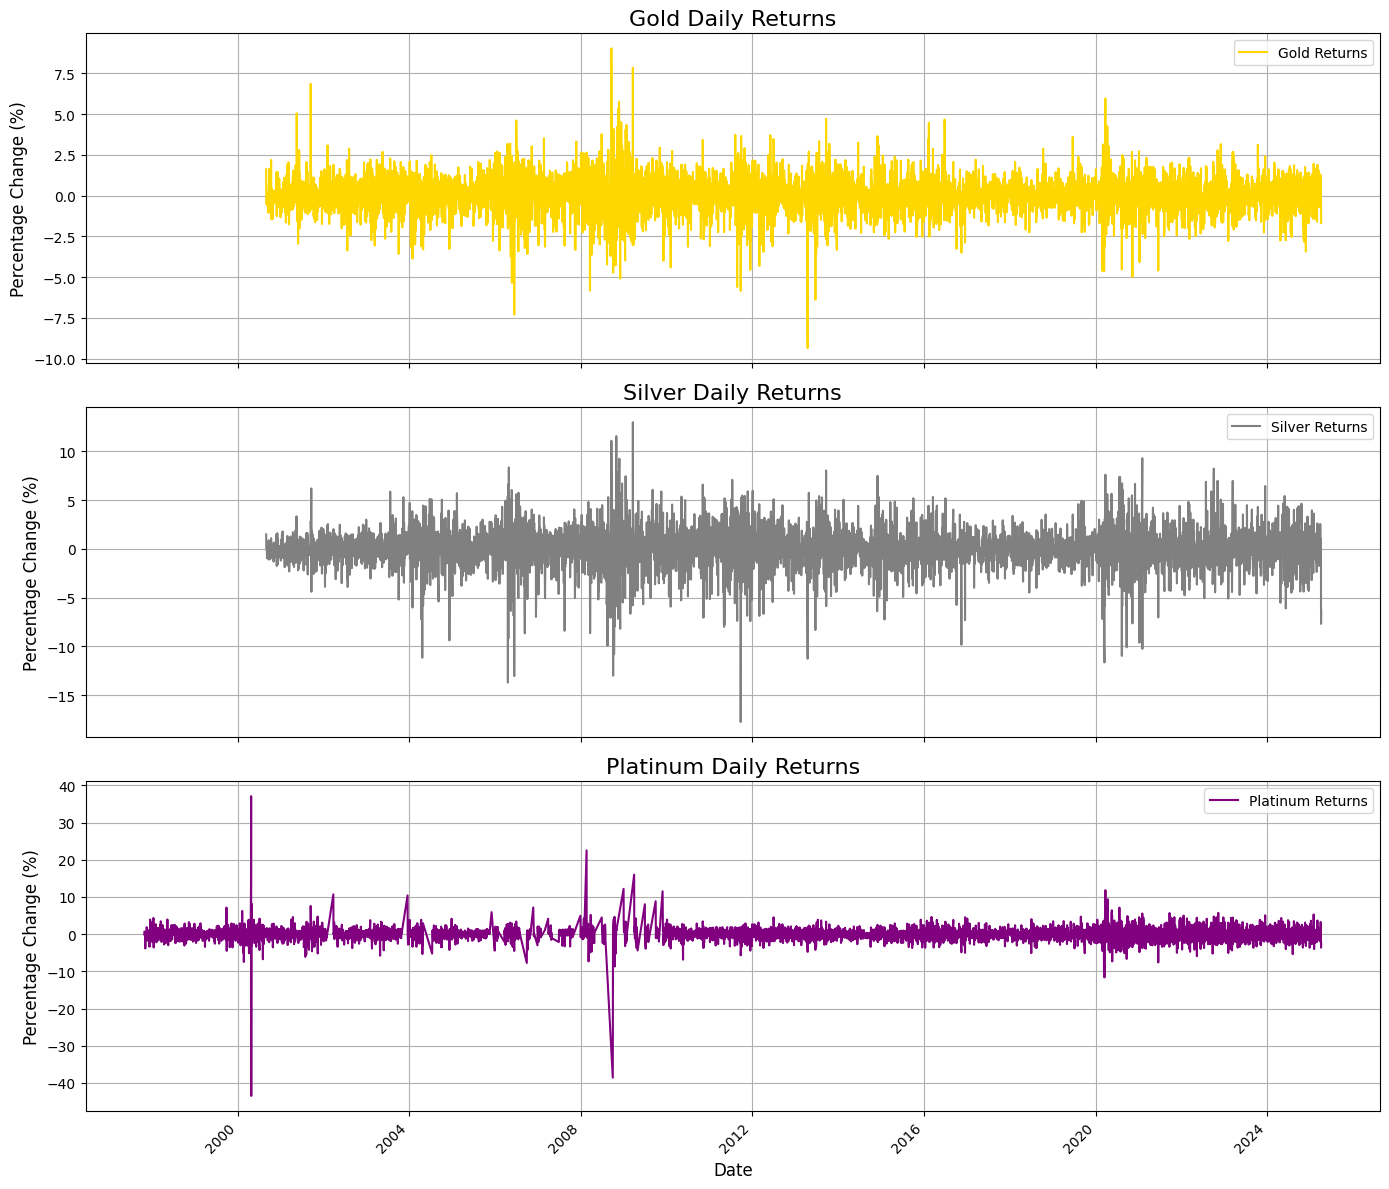

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
platinum = yf.Ticker("PL=F")

# Historical data
gold_data = gold.history(period="max")
silver_data = silver.history(period="max")
platinum_data = platinum.history(period="max")

# Calculate percentage daily returns
gold_returns = 100 * gold_data['Close'].pct_change().dropna()
silver_returns = 100 * silver_data['Close'].pct_change().dropna()
platinum_returns = 100 * platinum_data['Close'].pct_change().dropna()

# Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Gold
axes[0].plot(gold_returns.index, gold_returns.values, color='gold', label='Gold Returns')
axes[0].set_title('Gold Daily Returns', fontsize=16)
axes[0].set_ylabel('Percentage Change (%)', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Silver
axes[1].plot(silver_returns.index, silver_returns.values, color='gray', label='Silver Returns')
axes[1].set_title('Silver Daily Returns', fontsize=16)
axes[1].set_ylabel('Percentage Change (%)', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Platinum
axes[2].plot(platinum_returns.index, platinum_returns.values, color='purple', label='Platinum Returns')
axes[2].set_title('Platinum Daily Returns', fontsize=16)
axes[2].set_ylabel('Percentage Change (%)', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **VAR Implementation**

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                   Gold       Silver   Platinum
Date                                           
2010-01-04  1117.699951  1517.300049  17.440001
2010-01-05  1118.099976  1530.800049  17.781000
2010-01-06  1135.900024  1552.199951  18.163000
2010-01-07  1133.099976  1553.000000  18.333000
2010-01-08  1138.199951  1564.599976  18.458000
Eigenvalues:
 [0.00397314 0.00188667 0.00116764]

Trace Statistic:
 [26.97601107 11.71662033  4.47818215]

Critical Values (90%, 95%, 99%):
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Optimal Lag Order based on AIC/BIC:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.467      8.472*       4755.       8.469
1       8.462*       8.481      4730.*      8.469*
2        8.465       8.499       4745.       8.477
3        8.467       8.516       4756.       8.485
4        8.469       8.533       4766.       8

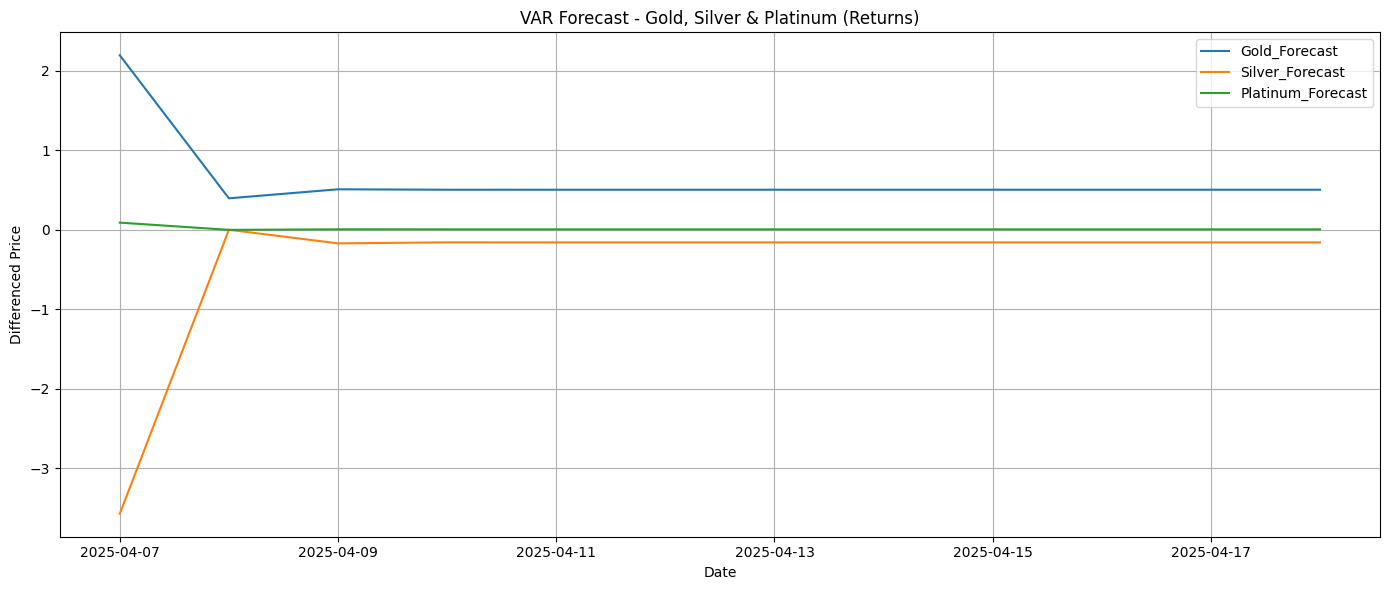

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.preprocessing import StandardScaler

# 1. Download data
tickers = ['GC=F', 'SI=F', 'PL=F']  # Gold, Silver, Platinum Futures
data = yf.download(tickers, start='2010-01-01')['Close']

# Rename columns
data.columns = ['Gold', 'Silver', 'Platinum']

# Drop missing values
data.dropna(inplace=True)

# Optional: Check the first few rows
print(data.head())

# 2. Johansen Cointegration Test
johan_test = coint_johansen(data, det_order=0, k_ar_diff=1)
print("Eigenvalues:\n", johan_test.eig)
print("\nTrace Statistic:\n", johan_test.lr1)
print("\nCritical Values (90%, 95%, 99%):\n", johan_test.cvt)

# 3. Differencing to make series stationary
data_diff = data.diff().dropna()

# 4. Fit VAR model
model = VAR(data_diff)
lag_order = model.select_order(maxlags=15)
print("\nOptimal Lag Order based on AIC/BIC:\n", lag_order.summary())

# Choose best lag from AIC
selected_lag = lag_order.selected_orders['aic']

var_model = model.fit(selected_lag)
print("\nVAR Model Summary:\n", var_model.summary())

# 5. Forecasting
forecast = var_model.forecast(data_diff.values[-selected_lag:], steps=10)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1], periods=11, freq='B')[1:],
                           columns=['Gold_Forecast', 'Silver_Forecast', 'Platinum_Forecast'])

# 6. Plotting Forecasts
plt.figure(figsize=(14, 6))
for i, metal in enumerate(['Gold_Forecast', 'Silver_Forecast', 'Platinum_Forecast']):
    plt.plot(forecast_df.index, forecast_df[metal], label=metal)

plt.title("VAR Forecast - Gold, Silver & Platinum (Returns)")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Cumulative Forecast (Price Forecast Instead of Returns)**



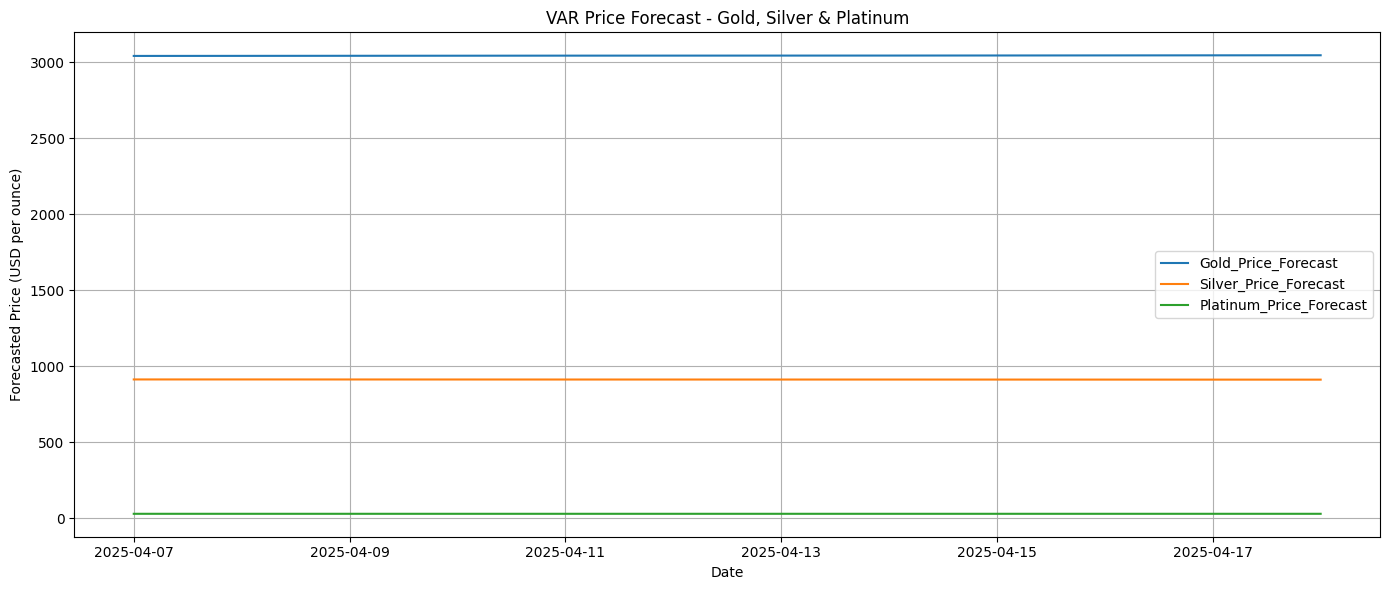

In [ ]:
# Start with the last known prices
last_prices = data.iloc[-1]

# Cumulative sum of predicted returns (undo differencing)
forecast_prices = forecast_df.cumsum()
forecast_prices += last_prices.values  # Add last actual prices

# Rename columns
forecast_prices.columns = ['Gold_Price_Forecast', 'Silver_Price_Forecast', 'Platinum_Price_Forecast']

# Plot price forecasts
plt.figure(figsize=(14, 6))
for col in forecast_prices.columns:
    plt.plot(forecast_prices.index, forecast_prices[col], label=col)

plt.title("VAR Price Forecast - Gold, Silver & Platinum")
plt.xlabel("Date")
plt.ylabel("Forecasted Price (USD per ounce)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Impulse Response Function (IRF)**

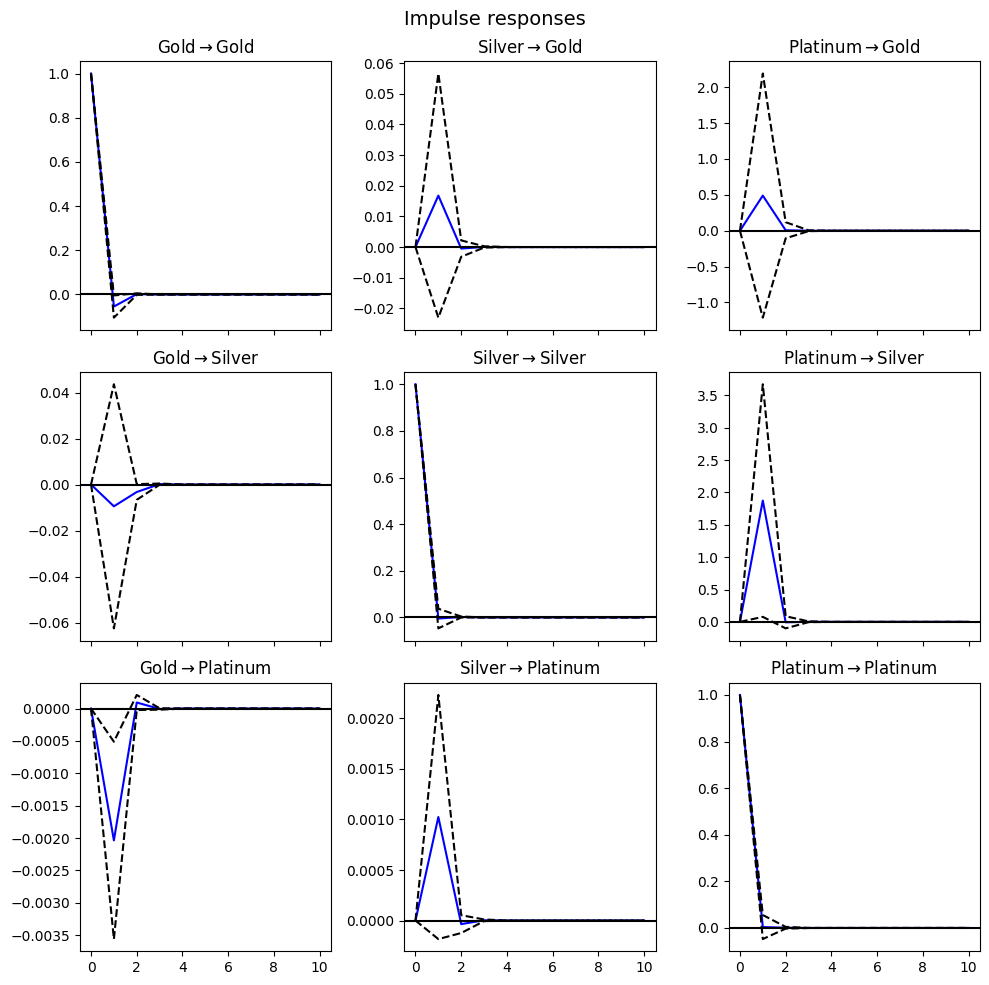

In [ ]:
irf = var_model.irf(10)  # 10-period horizon
irf.plot(orth=False)
plt.tight_layout()
plt.show()


**Granger Causality Test**

In [ ]:
from statsmodels.tsa.api import VAR
import pandas as pd
import yfinance as yf

# Downloading data
gold = yf.Ticker("GC=F").history(period="5y")['Close']
silver = yf.Ticker("SI=F").history(period="5y")['Close']
platinum = yf.Ticker("PL=F").history(period="5y")['Close']

# Combine and clean
data = pd.concat([gold, silver, platinum], axis=1)
data.columns = ['Gold', 'Silver', 'Platinum']
data.dropna(inplace=True)

# Log returns (percent change can also be used)
returns = data.pct_change().dropna()

# Fit VAR model
model = VAR(returns)
var_result = model.fit(maxlags=15, ic='aic')

# Granger causality tests
pairs = [('Gold', 'Silver'),
         ('Silver', 'Gold'),
         ('Gold', 'Platinum'),
         ('Platinum', 'Gold'),
         ('Silver', 'Platinum'),
         ('Platinum', 'Silver')]

for caused, causing in pairs:
    print(f"\nDoes {causing} Granger-cause {caused}?")
    test_result = var_result.test_causality(caused, causing, kind='f')
    print(test_result.summary())



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Does Silver Granger-cause Gold?
Granger causality F-test. H_0: Silver does not Granger-cause Gold. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value          df        
---------------------------------------------------------
         1.421          3.844   0.233 (1, np.int64(3756))
---------------------------------------------------------

Does Gold Granger-cause Silver?
Granger causality F-test. H_0: Gold does not Granger-cause Silver. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value          df        
---------------------------------------------------------
      0.002658          3.844   0.959 (1, np.int64(3756))
---------------------------------------------------------

Does Platinum Granger-cause Gold?
Granger causality F-test. H_0: Platinum does not Granger-cause Gold. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value          df        
---